# **Project 3**, APS1070 Fall 2024
#### **PCA [14 marks]**
**Deadline: Nov 15th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Mengyang Liu

##**Marking Scheme:**

This project is worth **14 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Part 1: Getting started with GitHub [1.5 Marks + 1.5 Mark Git Submission]

This first part of the project assignment is to be completed independently from Parts 2 - 5. In this part you will be completing some coding tasks and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac:
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Create a personal access token using your Github account. Go to Settings >> Developer Settings >> Personal access tokens >> Tokens (classic) and generate a new token (also classic). When creating the token make sure to fill the `Note` section and select the repo scope (for repository access, like pushing) and workflow (required to modify workflow files). Make sure you copy the Personal Access Token as soon as it gets generated.


 2. Open this link: https://classroom.github.com/a/oMeBXqsA to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS1070-UofT/f24-project-3-part-1-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

In [46]:
### Add the link here ###
# https://github.com/APS1070-UofT/f24-project-3-part-1-Fulankeee

 3. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 4. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 5. Get your assignment by the link you got in step 2:
```
git clone https://github.com/APS1070-UofT/f24-project-3-part-1-*********
```

 6. You will be asked to enter your Github username and password. Enter the username for your github account into the `Username` field, and paste the `personal access token` which you copied in step 1, into the `Password` field.


 7. A new folder should be created in your directory similar to:
```
C:\aps1070\f24-project-3-part-1-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions.

 8. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 7.

 9. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded.

 10. To submit your work, follow:
```
cd <your assignment folder>
git add F24_Project_3_Part_1_git.ipynb
git commit -m "Final Submission"    
git push
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or
git push origin HEAD:main
```

 11. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**

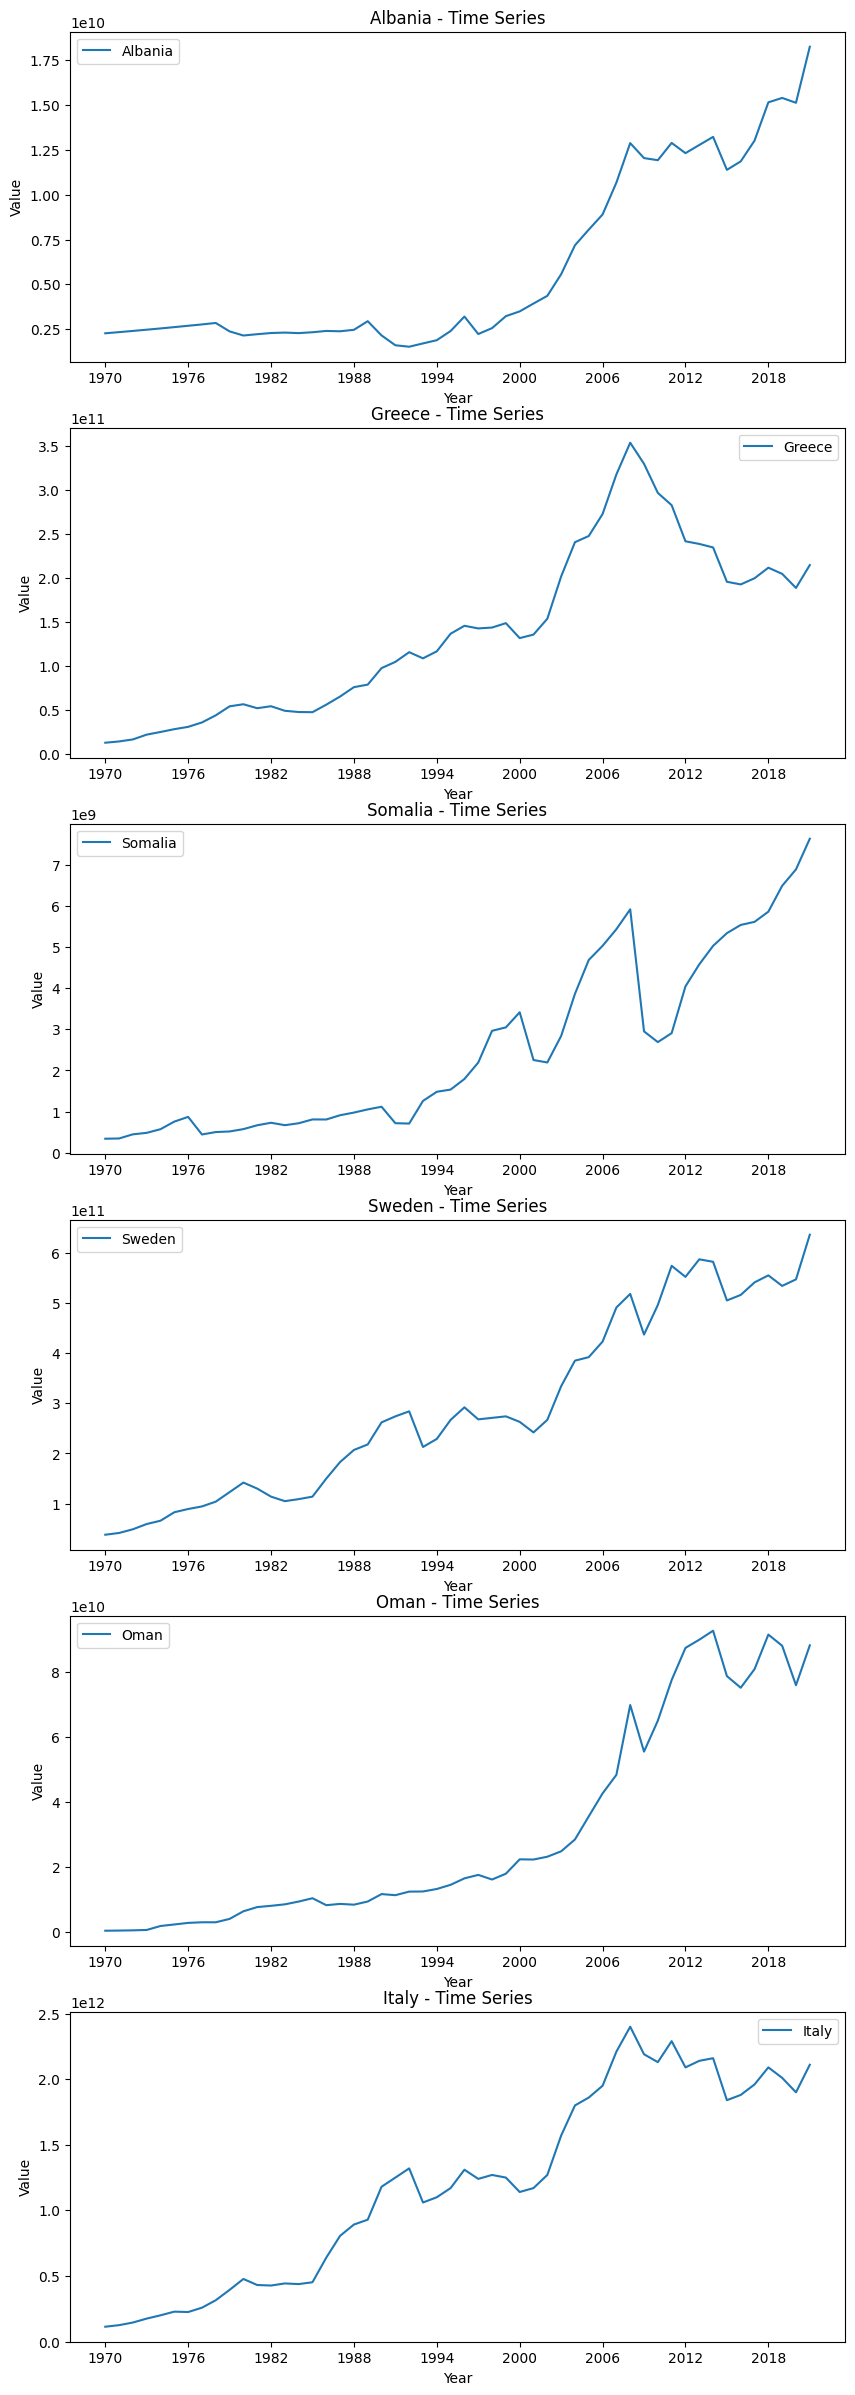

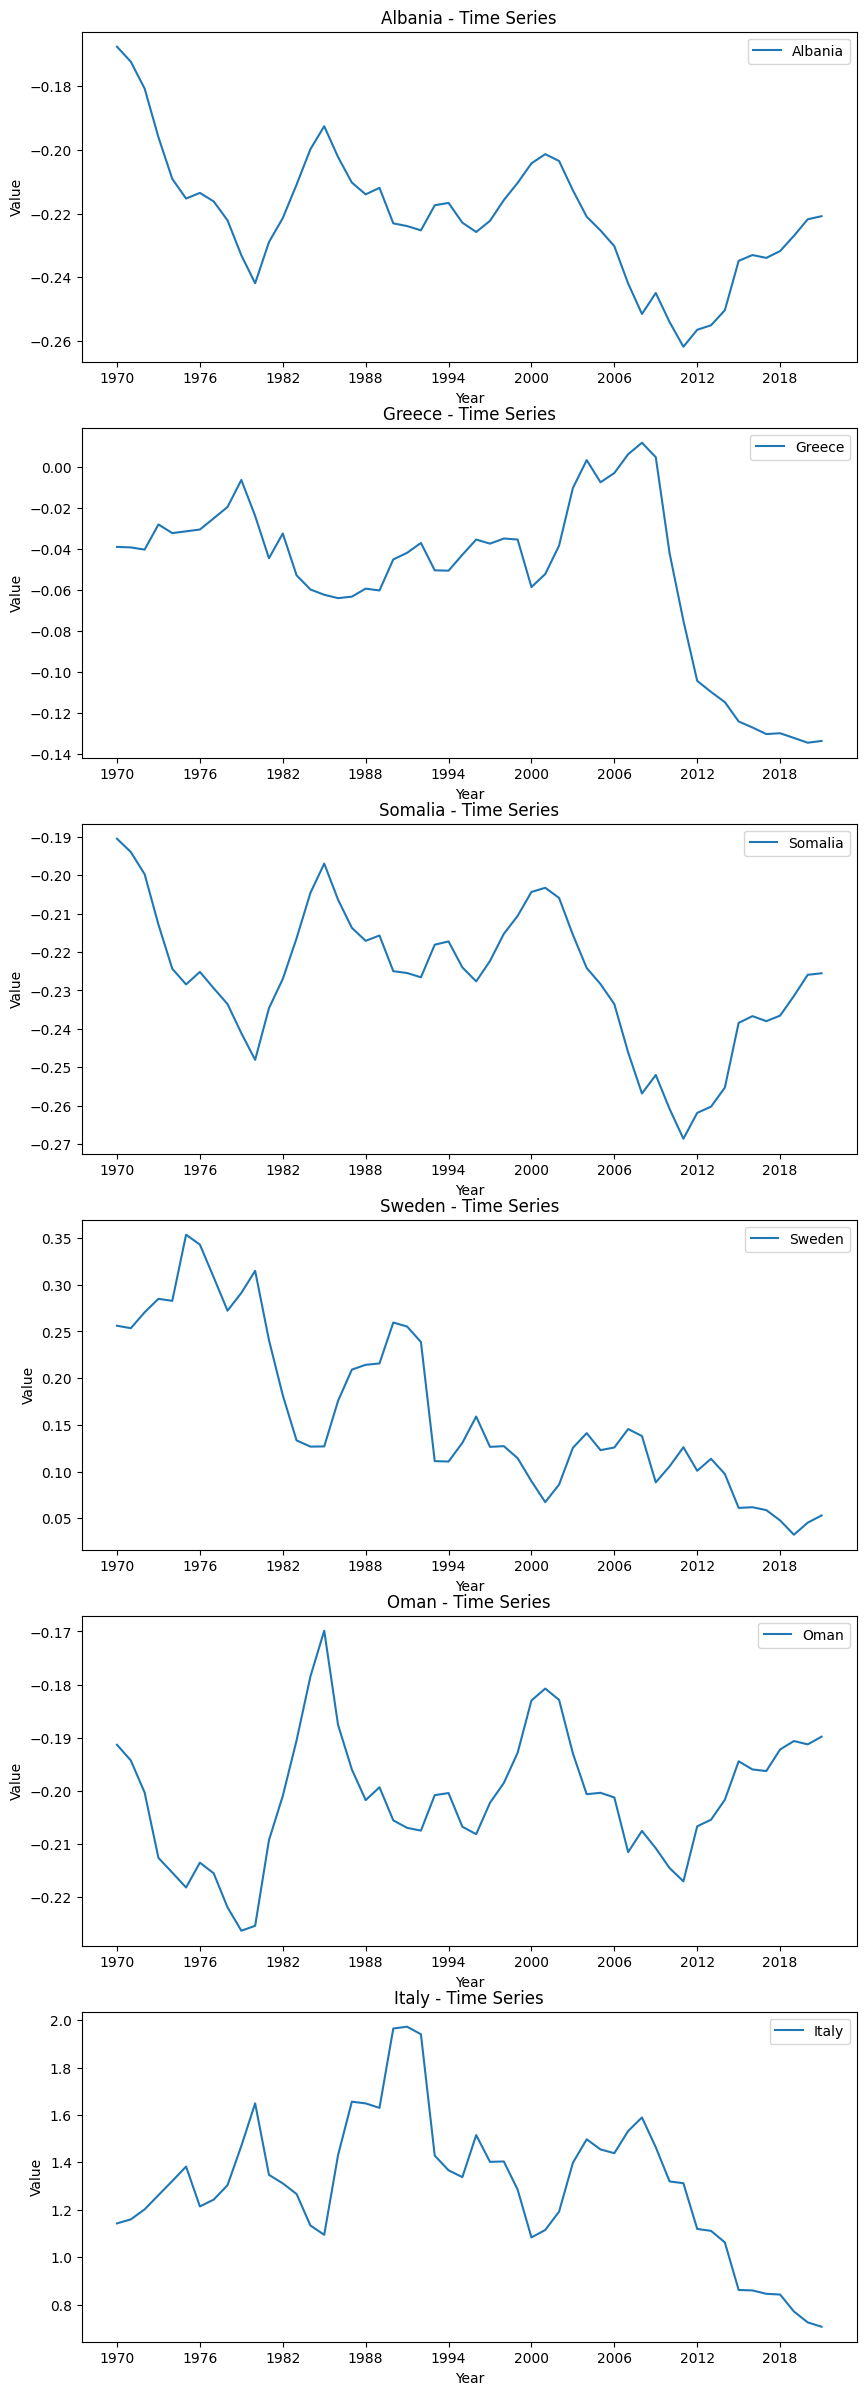

In [47]:
### MOVE YOUR ANSWER TO PART 1 HERE ###
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/domestic_product.csv',
    index_col=0
)
data_raw_backup = data_raw.copy() # backup the raw data form for further use

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data_raw)
data_std = pd.DataFrame(data_std, columns=data_raw.columns, index=data_raw.index)

data_std['Country'] = data_std.index
data_std.reset_index(drop=True, inplace=True)
data_std = pd.DataFrame(data_std)


data_raw['Country'] = data_raw.index
data_raw.reset_index(drop=True, inplace=True)
data_raw = pd.DataFrame(data_raw)

import matplotlib.pyplot as plt

def plot_data(df, country_list):
    df["Country"] = df["Country"].str.strip() # Remove possible leadings and spaces in the country names
    country_list = [country.strip() for country in country_list]

    # Filter out the specific countries
    data = df[df["Country"].isin(country_list)]

    # Set up subplots
    fig, axes = plt.subplots(len(country_list), 1, figsize=(10, 5 * len(country_list)))

    # Plot each country in the list
    for i, country in enumerate(country_list):
        # Filter the data for each specific country
        feature_country_data = data[data["Country"] == country]

        # Ensure that there is data for the specified country
        if feature_country_data.empty:
            print(f"No data found for country: {country}")
            continue

        # Extract the Year and Value columns
        Year = feature_country_data.columns[:-1]
        Value = feature_country_data.iloc[0, :-1].values

        # Plot the data
        axes[i].plot(Year, Value, label=country)
        axes[i].xaxis.set_major_locator(plt.MaxNLocator(10))
        axes[i].set_title(f"{country} - Time Series")
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel("Value")
        axes[i].legend()

    plt.show()

# Original data time series plot
C = ['Albania', 'Greece', 'Somalia', 'Sweden', 'Oman', 'Italy']
plot_data(data_raw, C)

# Standardized data time series plots
C = ['Albania', 'Greece', 'Somalia', 'Sweden', 'Oman', 'Italy']
plot_data(data_std, C)

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (52, 52).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99.9% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [48]:
### YOUR CODE HERE ###
# Q1
import numpy as np
data_std_Part3 = data_std.copy() # Use for part3
data_std = data_std.iloc[:, :-1]
n, m = data_std.shape
data_cov = np.dot(data_std.T, data_std) / (n-1)
data_cov.shape

(52, 52)

In [49]:
# Q2
def get_sorted_eigen(df_cov):
  eigenvalues, eigenvectors = np.linalg.eigh(df_cov)
  args = (-eigenvalues).argsort()

  return eigenvalues[args], eigenvectors[:, args]

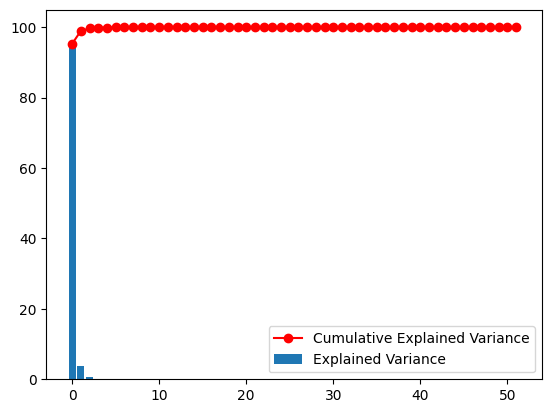

In [50]:
# Q3
import matplotlib.pyplot as plot

eigenValues, eigenVectors = get_sorted_eigen(data_cov)
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
plt.bar(range(52), expVar, label = 'Explained Variance')
plt.plot(cumExpVar, 'r-o', label = 'Cumulative Explained Variance')
plt.legend()
plt.show()

In [51]:
# Q4
for i in range(len(cumExpVar)):
  if cumExpVar[i] >= 99.9:
    print('Number of PCs needed: ',i+1)
    break

Number of PCs needed:  5


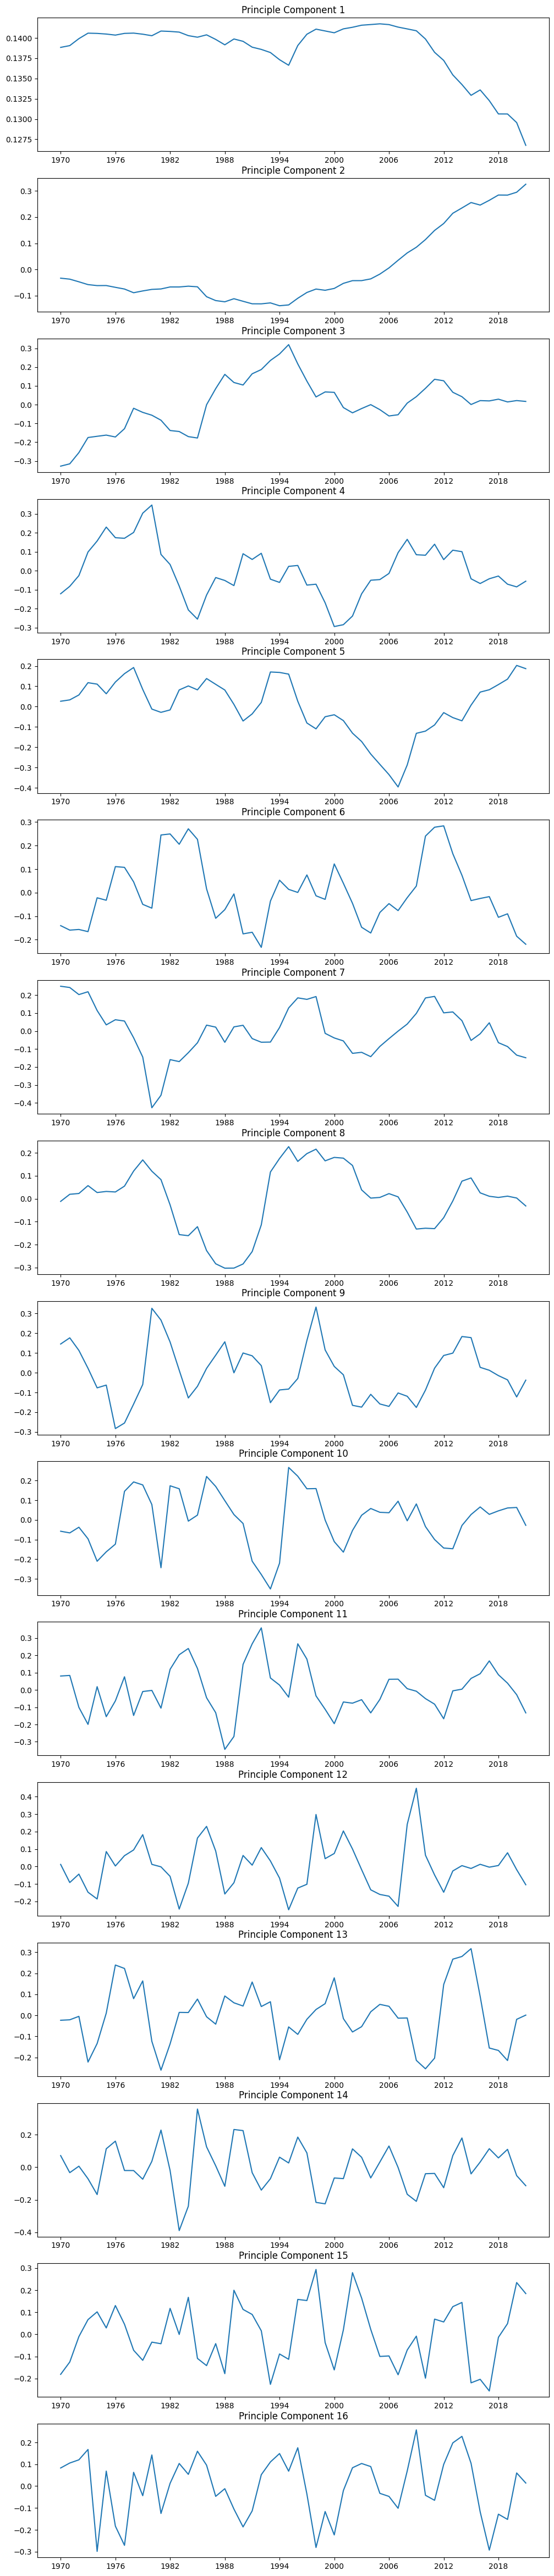

In [52]:
# Q5
def plot_function(n=16):
    date = data_std.columns
    fig, axs = plt.subplots(n, figsize=(12, 60))

    for i in range(n):
        axs[i].plot(date, eigenVectors[:,i])
        axs[i].set_title('Principle Component '+ str(i+1))
        axs[i].xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.show()
plot_function()

The first two time series plots are much different with the rest. With a generally decreased trend of plot principle component 1 and a generally increased trend of plot principle component 2, there is not too much fluctuation. This is beacause the first few cases are capturing the most intuitive cases, thus represnts the characteristics of a general trend. However, when getting more and more closer, they are supposed to capture more non-important pattern and more fluctuation will appear.

# Part 3: Data reconstruction [4.5 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each year `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the three countries you selected in `Part 1.3` plus ` Greece `,` Somalia `, and ` Italy ` as inputs. **[0.5]**


In [53]:
# Modify the function of part1
def plot_data_Part3(df, country):
    df["Country"] = df["Country"].str.strip()
    country = country.strip()
    feature_country_data = df[df["Country"] == country]

    # Ensure that there is data for the specified country
    if feature_country_data.empty:
        print(f"No data found for country: {country}")
        return

    # Extract the Year and Value columns (assuming Year is the first column, and Value is the second column)
    Year = feature_country_data.columns[:-1]
    Value = feature_country_data.iloc[0, :-1].values

    # Set up a single plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the data
    ax.plot(Year, Value, label=country)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_title(f"{country} - Original Time Series")
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    ax.legend()

    plt.show()

In [54]:
from sklearn.metrics import mean_squared_error

def plot_country_figures(original_df, country_name):
  # Plot1 the original time-series of the given country.
  plot_data_Part3(original_df, country_name)


  # Plot2 the incremental reconstruction of the original time-series for the specified country in a single plot.
  PC_list = [0,1,3,7,15]
  reconX = []
  date = original_df.columns[:-1]
  for num_of_eigenvector in PC_list:
    W = eigenVectors[:, 0:num_of_eigenvector]
    std_country = data_std_Part3.loc[data_std_Part3['Country'] == country_name, data_std_Part3.columns[:-1]].values
    projX = np.dot(std_country, W)
    reconstruction = scaler.inverse_transform(np.dot(projX, W.T))
    reconX.append(reconstruction.reshape(52))

  plt.figure(figsize=(10, 6))
  for i in range(len(PC_list)):
     data = reconX[i]
     PCindex = str(PC_list[i] + 1)
     plt.plot(date, data, label='PC 1 to PC {}'.format(PCindex))
     plt.title('The incremental reconstruction of the original time-series for '+country_name+' with PC '+PCindex)
     plt.xlabel('Date')
     plt.ylabel('Value')
     plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
     plt.legend()


  # Plot3 The residual error for your best reconstruction with respect to the original time-series.
  PC_list = [0,1,3,7,15]
  resid = []
  plt.figure(figsize=(10, 6))
  for num_of_eigenvector in PC_list:
    W = eigenVectors[:, 0:num_of_eigenvector]
    std_country = data_std_Part3.loc[data_std_Part3['Country'] == country_name, data_std_Part3.columns[:-1]].values
    projX = np.dot(std_country, W)
    reconstruction = scaler.inverse_transform(np.dot(projX, W.T))

    # Get the residual
    residual = original_df.loc[original_df['Country'] == country_name, original_df.columns[:-1]].values - reconstruction
    resid.append(residual)

  residual_error = [np.mean(np.sum(r)**2) for r in resid]
  min_index = np.argmin(residual_error)
  minr = resid[min_index]
  index = str(PC_list[min_index] + 1)
  minr_df = pd.DataFrame(minr, columns = date)
  plt.plot(minr_df.iloc[0,:], label='PC 1 to PC '+index)
  plt.title("Residual Error for best construction "+country_name) 
  plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
  plt.legend()


  # Plot4 The RMSE of the reconstruction as a function of the number of included components.
  reconX = []
  rmse_list = []

  plt.figure(figsize=(10, 6))
  for num_of_eigenvector in range(10):
    W = eigenVectors[:, 0:num_of_eigenvector]
    std_country = data_std_Part3.loc[data_std_Part3['Country'] == country_name, data_std_Part3.columns[:-1]].values
    projX = np.dot(std_country, W)
    reconstruction = scaler.inverse_transform(np.dot(projX, W.T))

  # Get the rmse
    rmse = mean_squared_error(original_df.loc[original_df['Country'] == country_name, original_df.columns[:-1]].values.flatten(), reconstruction.flatten())**0.5
    rmse_list.append(rmse)

  plt.plot(rmse_list)
  plt.title('RMSE for '+ country_name)
  plt.xlabel('Number of PC')
  plt.ylabel("RMSE")
  plt.tight_layout()
  plt.show()

In [55]:
data_raw

1970          1971          1972          1973          1974  \
0    1.731436e+09  1.812838e+09  1.647900e+09  1.702716e+09  2.061729e+09   
1    2.265577e+09  2.330585e+09  2.397526e+09  2.466543e+09  2.537016e+09   
2    5.155121e+09  5.363676e+09  7.176428e+09  9.229622e+09  1.325976e+10   
3    9.947679e+07  1.131285e+08  1.435060e+08  1.908638e+08  2.360555e+08   
4    3.806982e+09  4.007445e+09  4.102155e+09  5.016276e+09  5.626961e+09   
..            ...           ...           ...           ...           ...   
174  3.800994e+07  4.106648e+07  5.456834e+07  6.656775e+07  6.638025e+07   
175  1.386364e+10  1.522727e+10  1.674419e+10  2.000000e+10  3.046512e+10   
176  2.775103e+09  3.023992e+09  3.236929e+09  3.350312e+09  3.604731e+09   
177  1.544192e+09  1.574165e+09  1.851647e+09  2.349834e+09  2.894548e+09   
178  2.336518e+09  2.701725e+09  3.336472e+09  4.103781e+09  4.938099e+09   

             1975          1976          1977          1978          1979  \
0    2.319754e+09  2.513581e+09  2.864939e+09  3.222964e+09  3.630768e+09   
1    2.610110e+09  2.685746e+09  2.760746e+09  2.842276e+09  2.372306e+09   
2    1.555555e+10  1.775003e+10  2.099094e+10  2.637376e+10  3.320143e+10   
3    2.785143e+08  2.875884e+08  3.213901e+08  3.897459e+08  5.207423e+08   
4    4.147433e+09  3.980907e+09  4.344225e+09  4.845482e+09  5.380155e+09   
..            ...           ...           ...           ...           ...   
174  8.030427e+07  7.756354e+07  8.125372e+07  9.915994e+07  1.304919e+08   
175  3.209302e+10  3.674419e+10  4.232558e+10  4.604651e+10  5.651163e+10   
176  3.896483e+09  4.540827e+09  5.413318e+09  6.531933e+09  7.140326e+09   
177  2.658265e+09  2.813703e+09  2.767426e+09  3.098138e+09  3.827221e+09   
178  5.420653e+09  5.357271e+09  5.410607e+09  5.413154e+09  6.421606e+09   

     ...          2013          2014          2015          2016  \
0    ...  1.962180e+10  1.955070e+10  1.871305e+10  1.801956e+10   
1    ...  1.277628e+10  1.322824e+10  1.138692e+10  1.186136e+10   
2    ...  2.100000e+11  2.140000e+11  1.660000e+11  1.600000e+11   
3    ...  3.192603e+09  3.267334e+09  2.788758e+09  2.894646e+09   
4    ...  1.370000e+11  1.460000e+11  1.160000e+11  1.010000e+11   
..   ...           ...           ...           ...           ...   
174  ...  8.017876e+08  8.149505e+08  7.596893e+08  8.043282e+08   
175  ...  3.710000e+11  3.640000e+11  3.440000e+11  2.890000e+11   
176  ...  2.140000e+11  2.330000e+11  2.390000e+11  2.570000e+11   
177  ...  2.658525e+10  2.669314e+10  2.085896e+10  2.145262e+10   
178  ...  1.909102e+10  1.949552e+10  1.996312e+10  2.054868e+10   

             2017          2018          2019          2020          2021  \
0    1.889635e+10  1.841885e+10  1.890449e+10  2.014344e+10  1.493901e+10   
1    1.301973e+10  1.515644e+10  1.540183e+10  1.513187e+10  1.826004e+10   
2    1.700000e+11  1.750000e+11  1.720000e+11  1.460000e+11  1.630000e+11   
3    3.000160e+09  3.218419e+09  3.155152e+09  2.890998e+09  3.324648e+09   
4    1.220000e+11  1.010000e+11  8.313674e+10  5.482108e+10  7.053324e+10   
..            ...           ...           ...           ...           ...   
174  8.800470e+08  9.147011e+08  9.404540e+08  9.094210e+08  9.805715e+08   
175  2.480000e+11  2.040000e+11  1.500000e+11  1.060000e+11  1.120000e+11   
176  2.810000e+11  3.100000e+11  3.340000e+11  3.470000e+11  3.660000e+11   
177  2.586816e+10  2.631198e+10  2.331036e+10  1.811064e+10  2.131337e+10   
178  2.204065e+10  2.364527e+10  2.259452e+10  2.166475e+10  2.411815e+10   

                                Country  
0                           Afghanistan  
1                               Albania  
2                               Algeria  
3                               Andorra  
4                                Angola  
..                                  ...  
174                             Vanuatu  
175  Venezuela (Bolivarian Republic of)  
176                            Viet Nam  
1

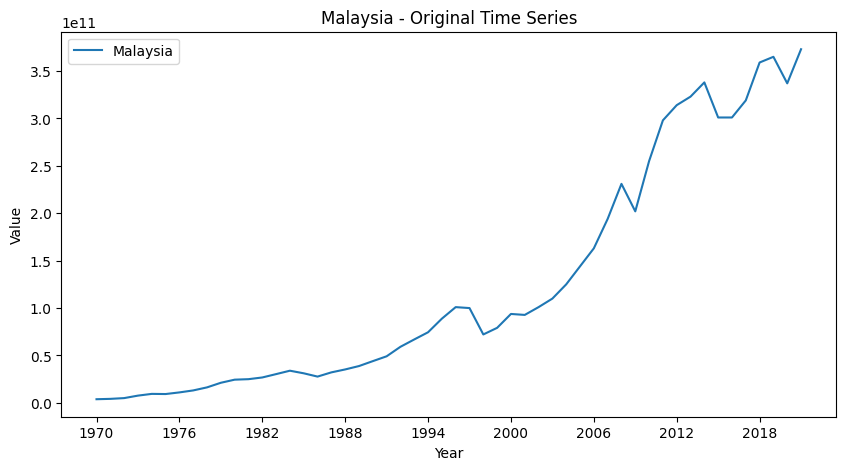

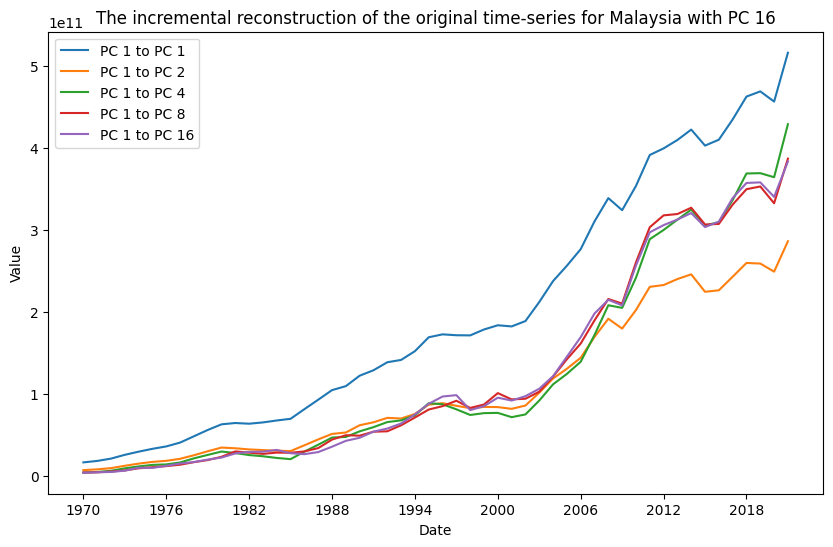

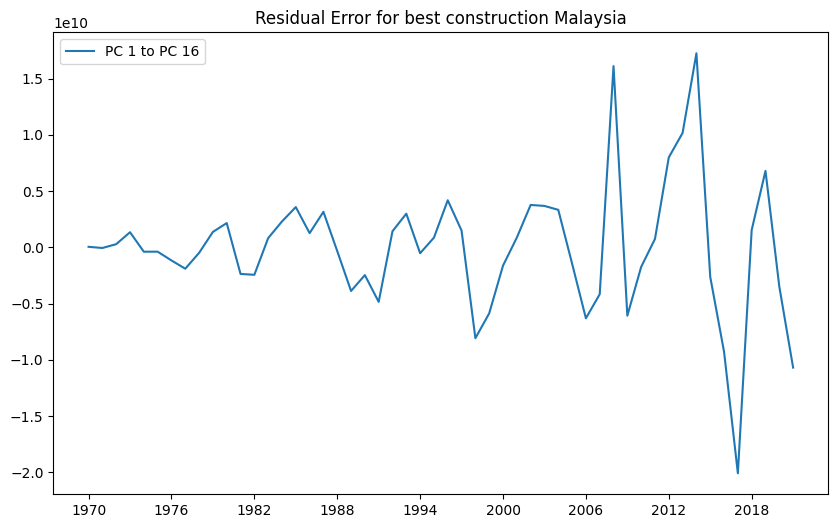

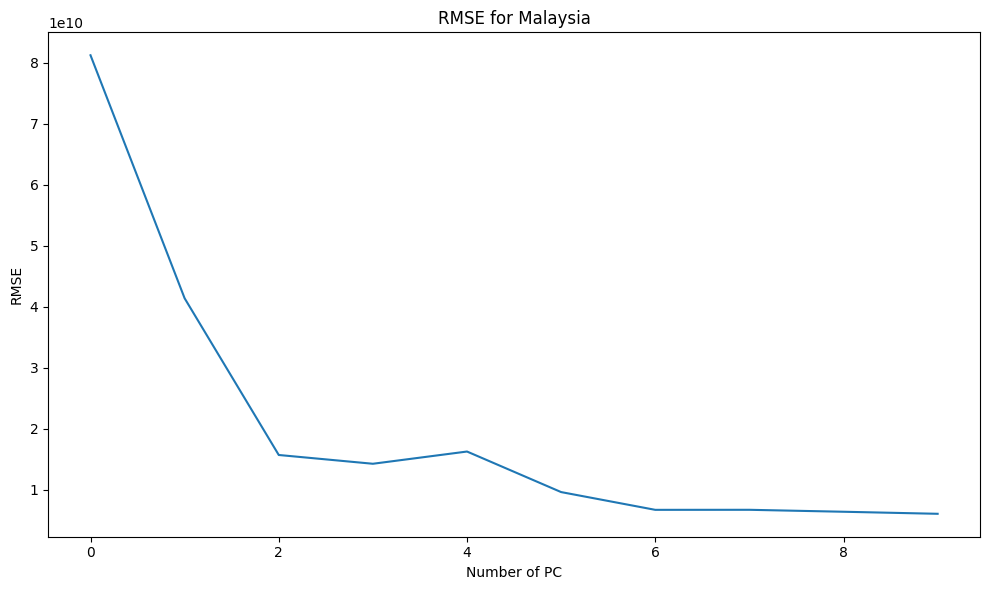

In [56]:
plot_country_figures(data_raw, 'Malaysia')

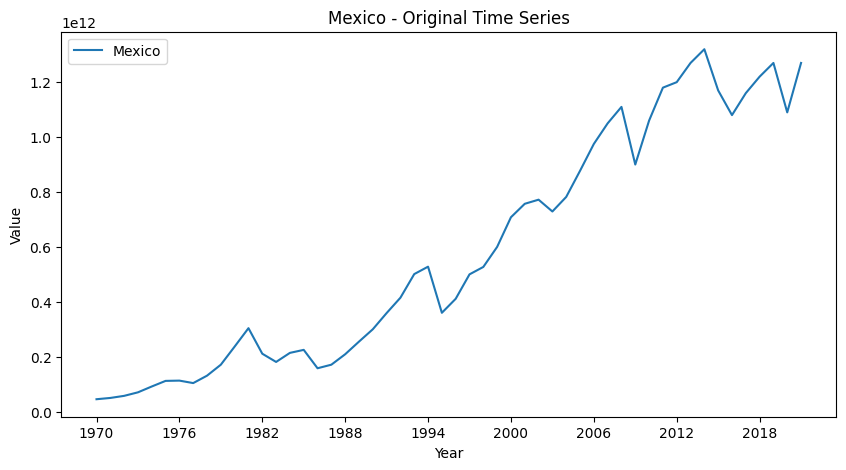

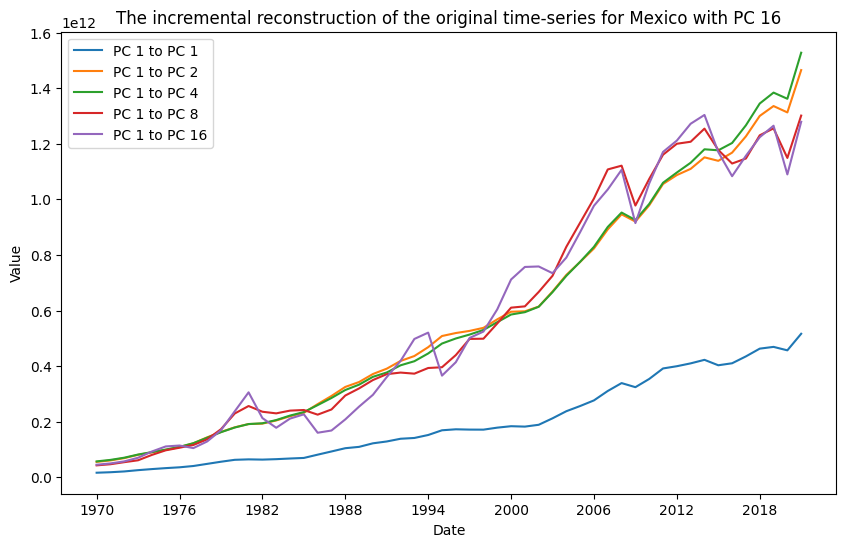

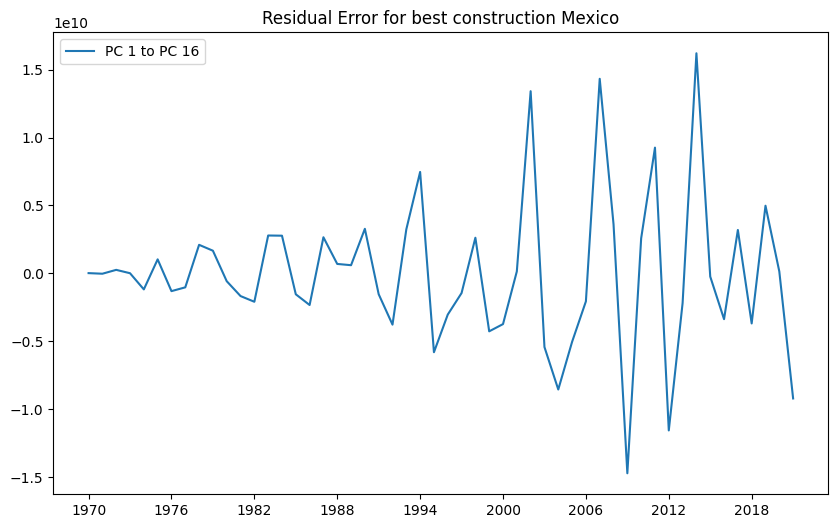

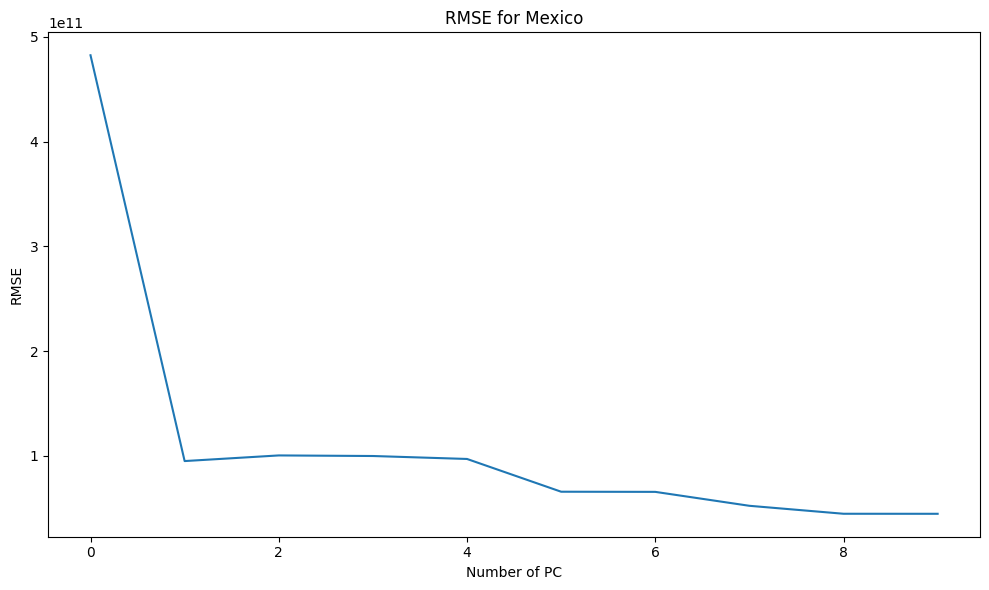

In [57]:
plot_country_figures(data_raw, 'Mexico')

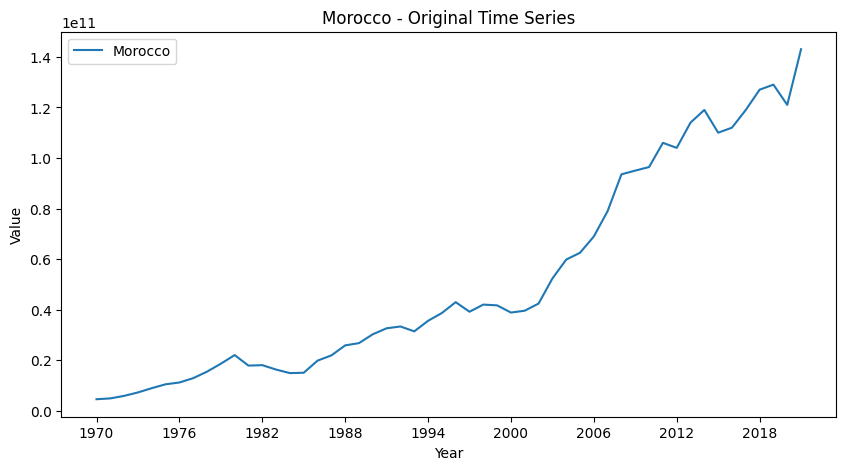

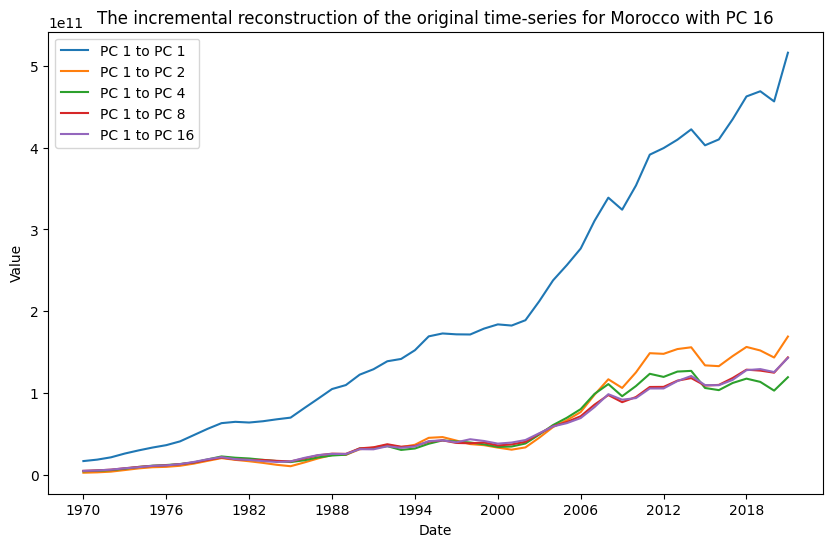

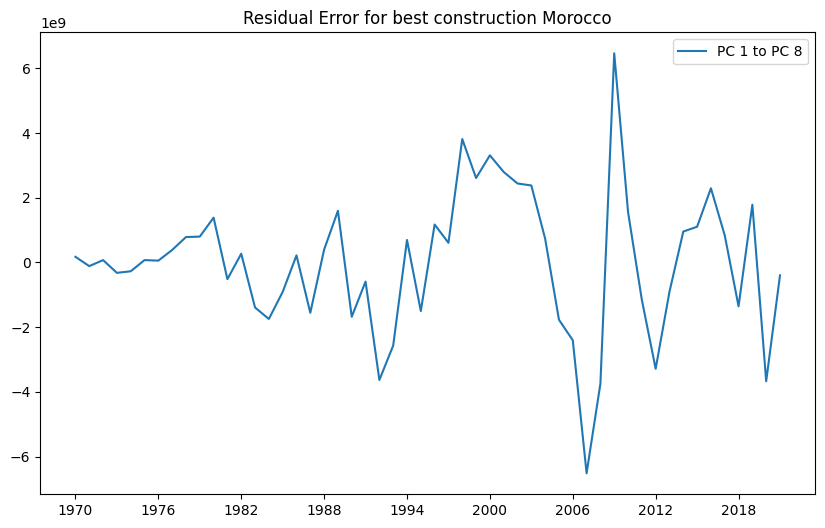

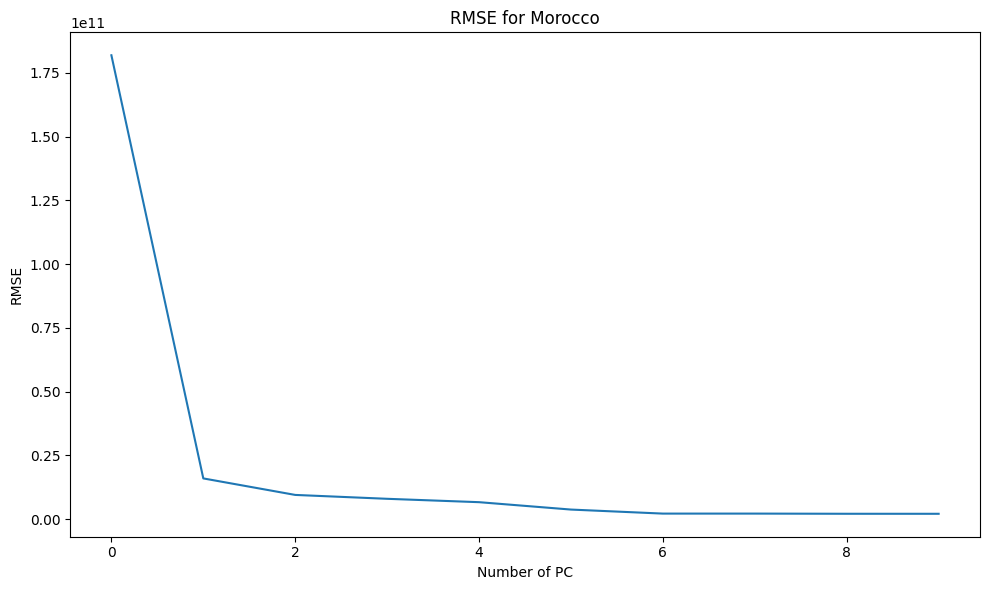

In [58]:
plot_country_figures(data_raw, 'Morocco')

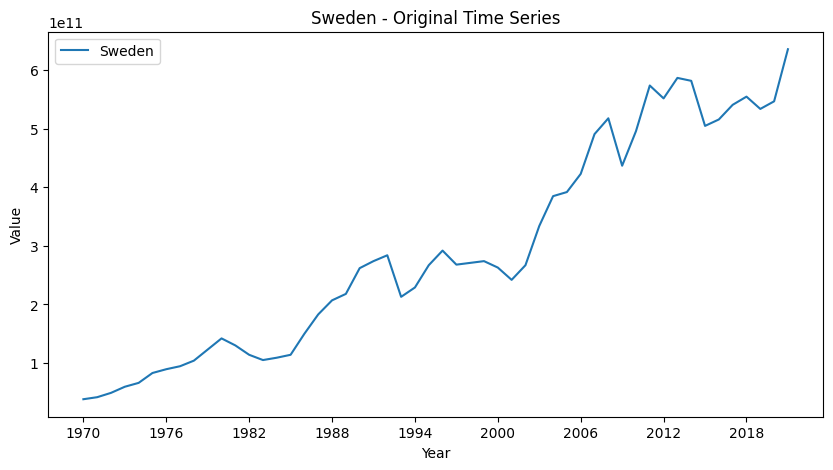

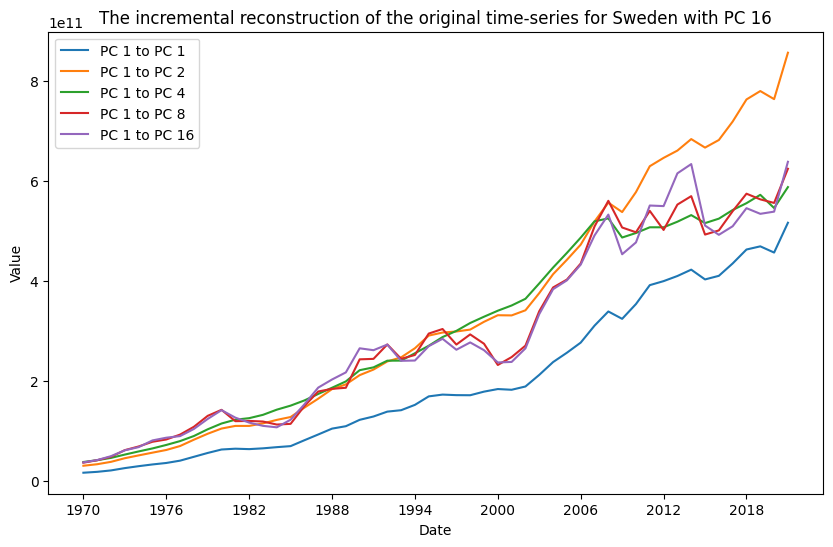

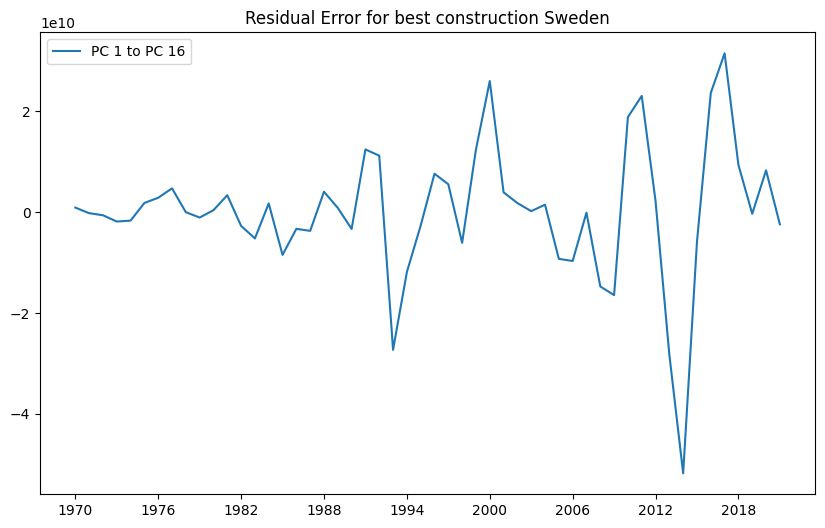

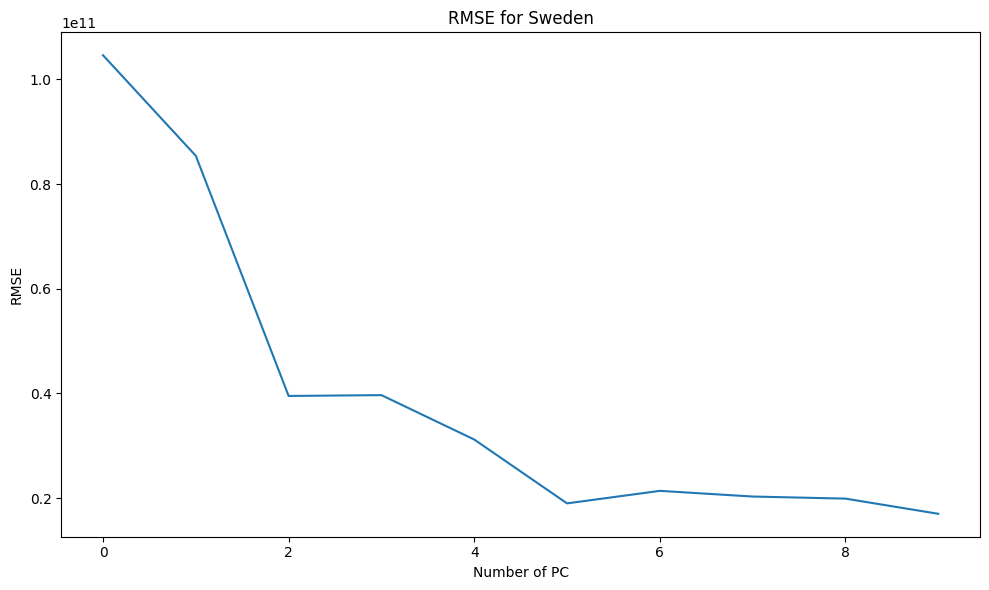

In [59]:
plot_country_figures(data_raw, 'Sweden')

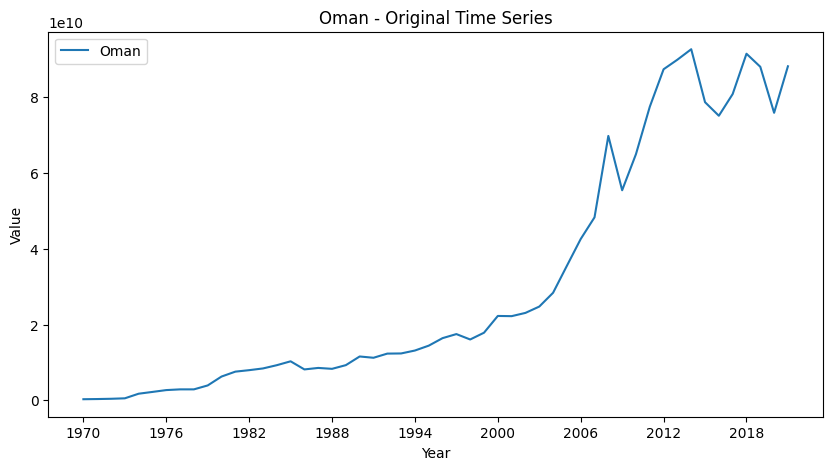

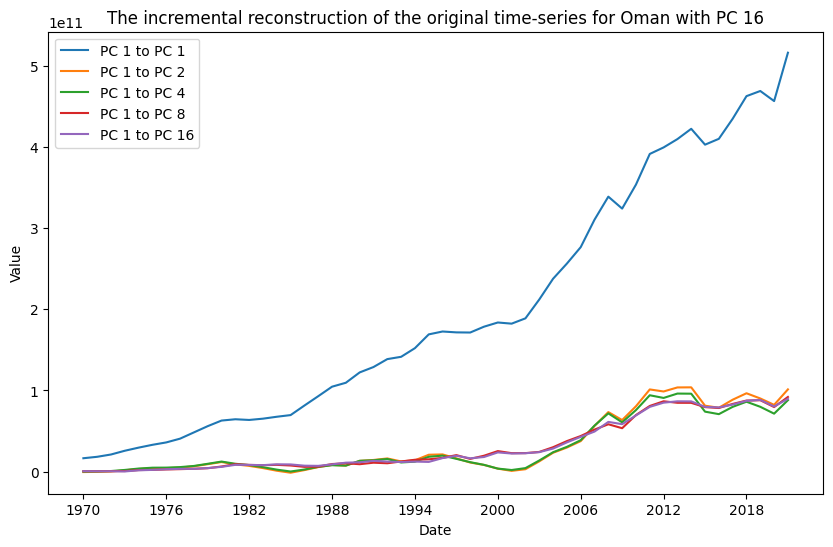

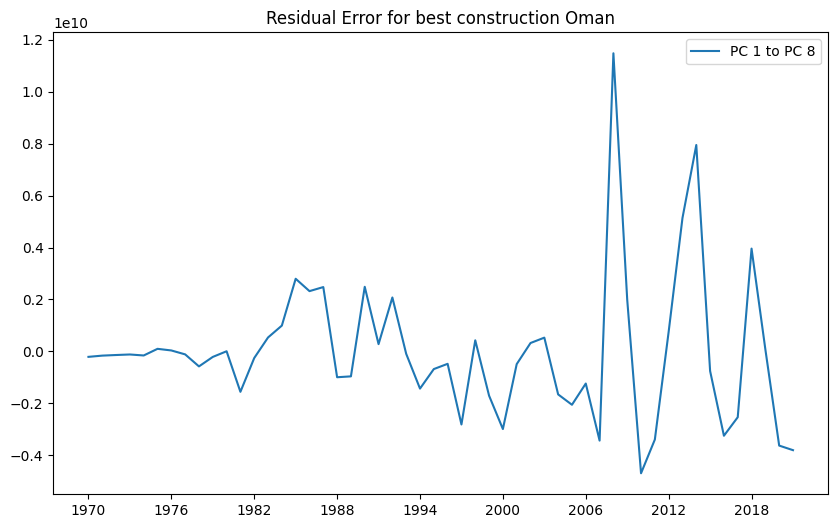

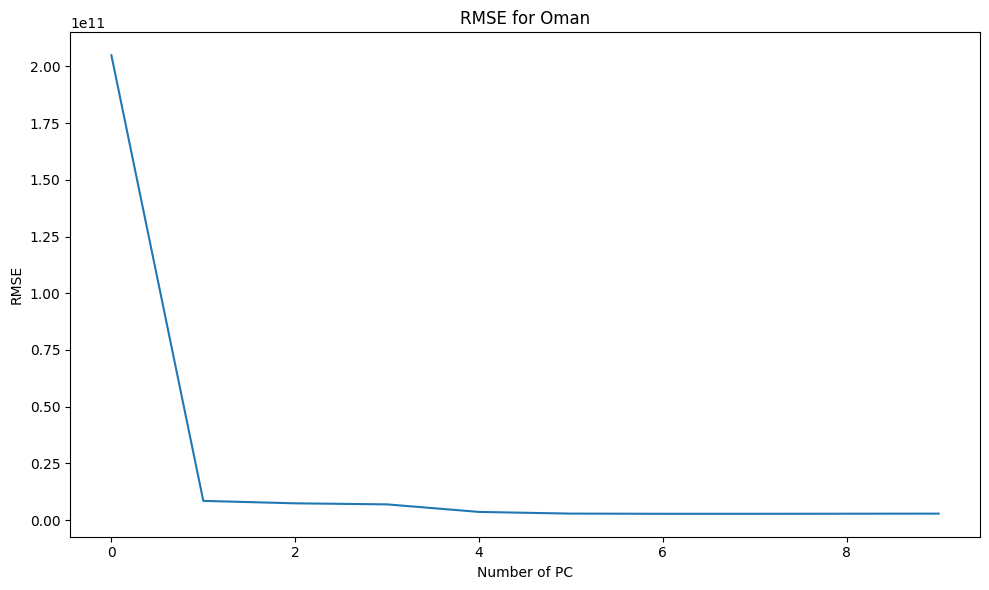

In [60]:
plot_country_figures(data_raw, 'Oman')

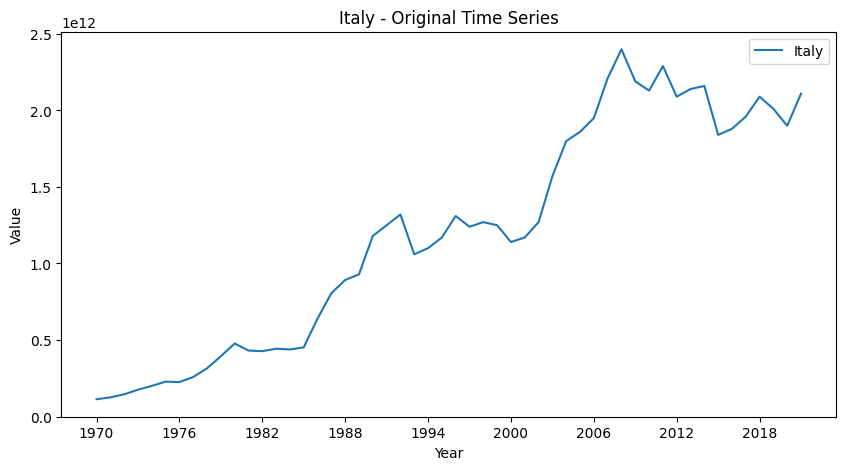

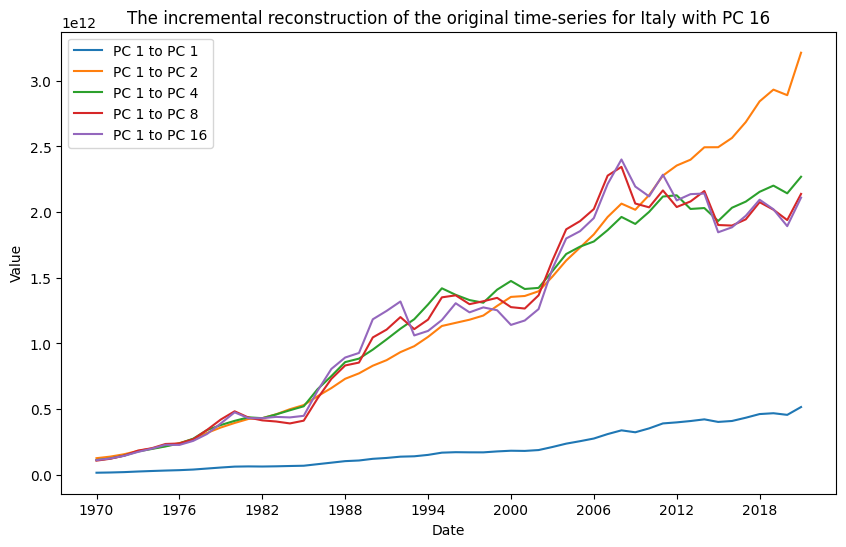

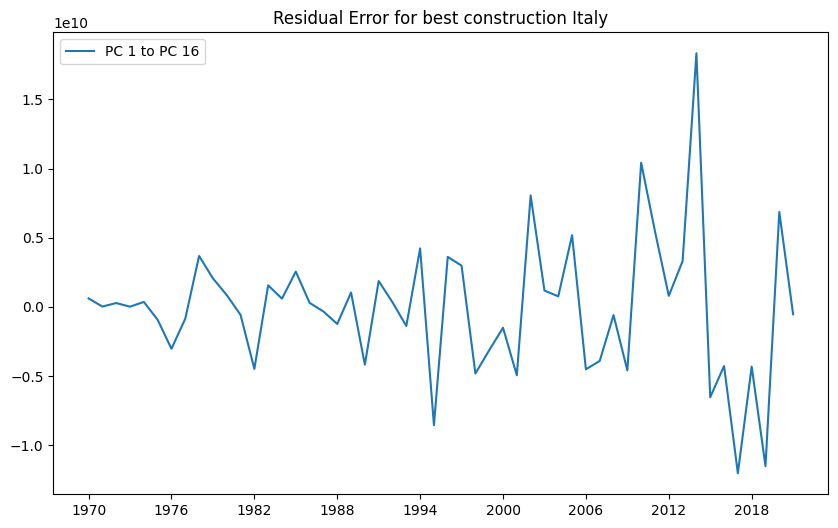

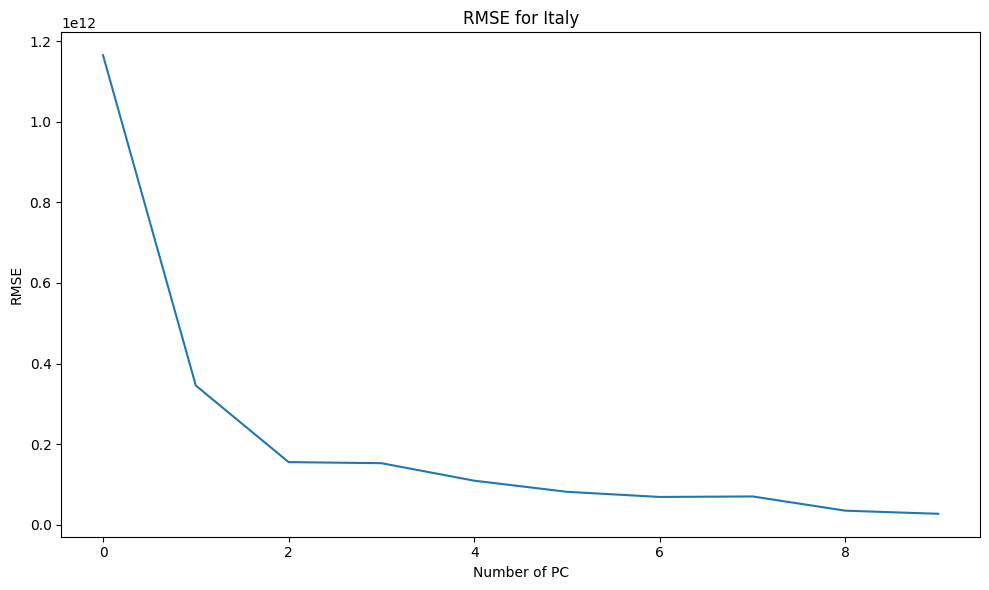

In [61]:
plot_country_figures(data_raw, 'Italy')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**.

In [62]:
### YOUR CODE HERE ###
# Modify my code in part3 to use SVD

from sklearn.metrics import mean_squared_error

def plot_country_figures_SVD(original_df, country_name):
  # Use SVD instead of PCA
  U, s, V = np.linalg.svd(original_df.iloc[:,:-1], full_matrices=False)
  eigenVectors = V.T
  idx = np.argsort(-s)
  eigenVectors = eigenVectors[:,idx] # Get the reordered eigenvectors


  # Plot1 the original time-series of the given country.
  plot_data_Part3(original_df, country_name)


  # Plot2 the incremental reconstruction of the original time-series for the specified country in a single plot.
  PC_list = [0,1,3,7,15]
  reconX = []
  date = original_df.columns[:-1]
  for num_of_eigenvector in PC_list:
    W = eigenVectors[:, 0:num_of_eigenvector]
    country = original_df.loc[original_df['Country'] == country_name, original_df.columns[:-1]].values
    projX = np.dot(country, W)
    reconstruction = np.dot(projX, W.T)
    reconX.append(reconstruction.reshape(52))

  plt.figure(figsize=(10, 6))
  for i in range(len(PC_list)):
     data = reconX[i]
     PCindex = str(PC_list[i] + 1)
     plt.plot(date, data, label='PC 1 to PC {}'.format(PCindex))
     plt.title('The incremental reconstruction of the original time-series for '+country_name+' with PC '+PCindex)
     plt.xlabel('Date')
     plt.ylabel('Value')
     plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
     plt.legend()


  # Plot3 The residual error for your best reconstruction with respect to the original time-series.
  PC_list = [0,1,3,7,15]
  resid = []
  plt.figure(figsize=(10, 6))
  for num_of_eigenvector in PC_list:
    W = eigenVectors[:, 0:num_of_eigenvector]
    country = original_df.loc[original_df['Country'] == country_name, original_df.columns[:-1]].values
    projX = np.dot(country, W)
    reconX = np.dot(projX, W.T)
    reconX = reconX.reshape(1, -1)

    # Get the residual
    residual = original_df.loc[original_df['Country'] == country_name, original_df.columns[:-1]].values - reconX
    resid.append(residual)

  residual_error = [np.mean(np.sum(r)**2) for r in resid]
  min_index = np.argmin(residual_error)
  minr = resid[min_index]
  index = str(PC_list[min_index] + 1)
  minr_df = pd.DataFrame(minr, columns = date)
  plt.plot(minr_df.iloc[0,:], label='PC 1 to PC '+index)
  plt.title("Residual Error for best construction "+country_name) 
  plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
  plt.legend()


  # Plot4 The RMSE of the reconstruction as a function of the number of included components.
  reconX = []
  rmse_list = []

  plt.figure(figsize=(10, 6))
  for num_of_eigenvector in range(10):
    W = eigenVectors[:, 0:num_of_eigenvector]
    country = original_df.loc[original_df['Country'] == country_name, original_df.columns[:-1]].values
    projX = np.dot(country, W)
    reconX = np.dot(projX, W.T)
    reconX = reconX.reshape(1, -1)

  # Get the rmse
    rmse = mean_squared_error(original_df.loc[original_df['Country'] == country_name, original_df.columns[:-1]].values.flatten(), reconX.flatten())**0.5
    rmse_list.append(rmse)

  plt.plot(rmse_list)
  plt.title('RMSE for '+ country_name)
  plt.xlabel('Number of PC')
  plt.ylabel("RMSE")
  plt.tight_layout()
  plt.show()

SVD does not require standardization or covariance computation. It directly decomposes a matrix into its constituent parts without requirments to scale the data. This makes it a versatile tool that can be applied to any matrix as it is, regardless of the scale or mean of its features. SVD saves the trouble of standardization, whereas PCA relies on the covariance matrix and thus requires standardization for accurate results.

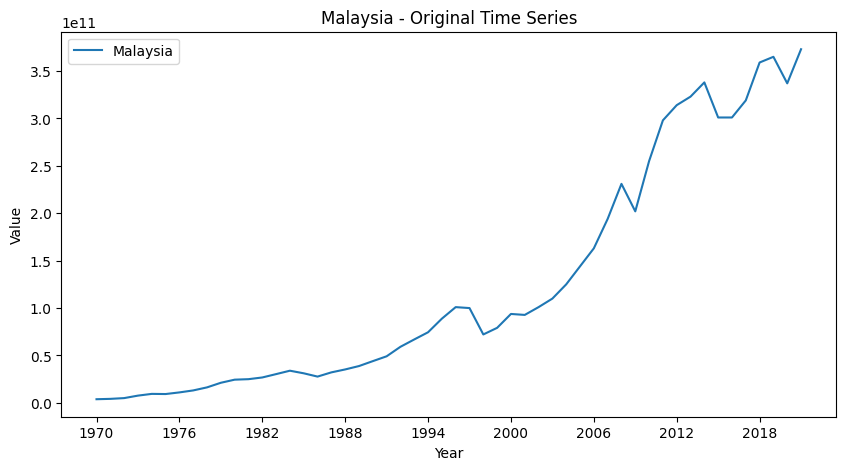

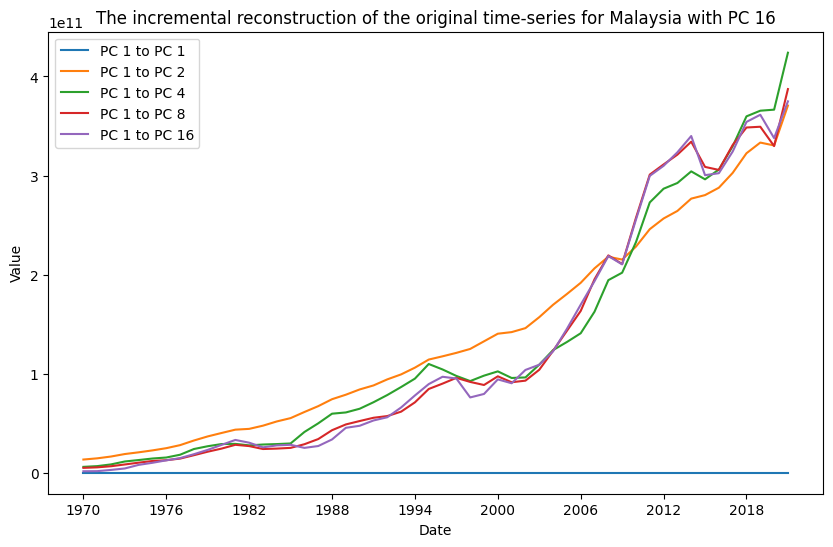

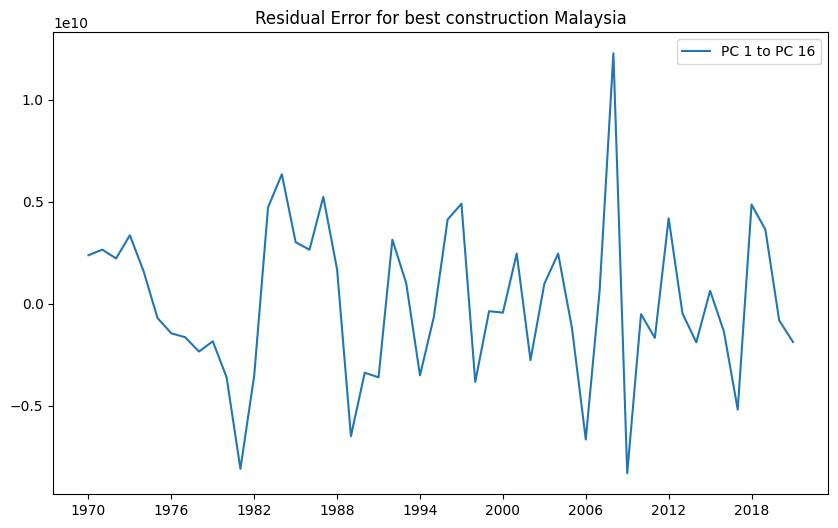

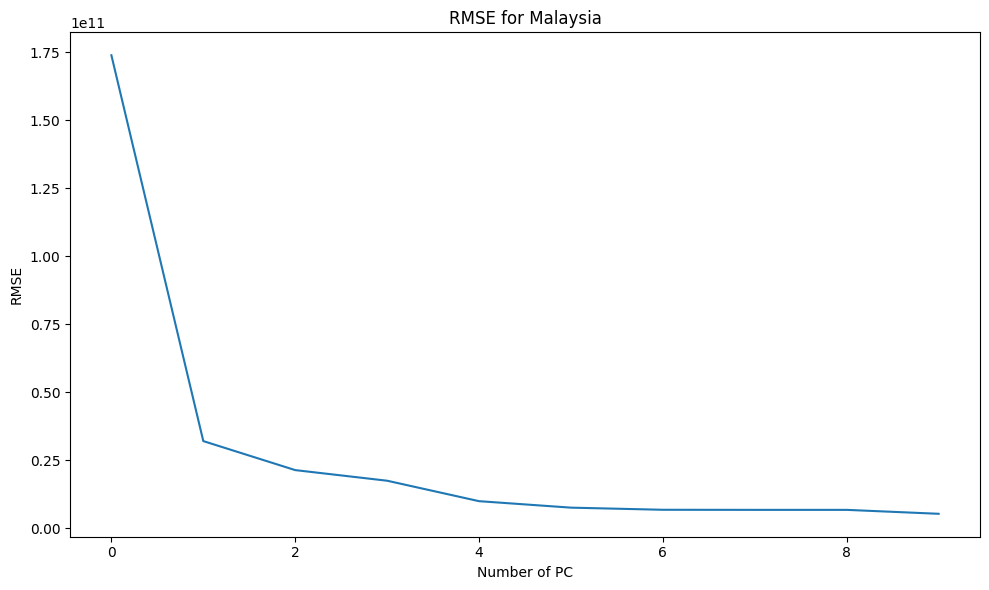

In [63]:
plot_country_figures_SVD(data_raw, 'Malaysia')

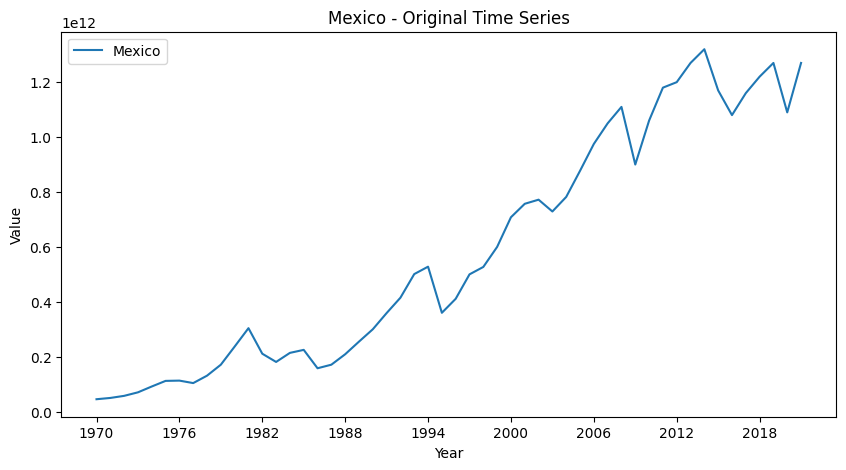

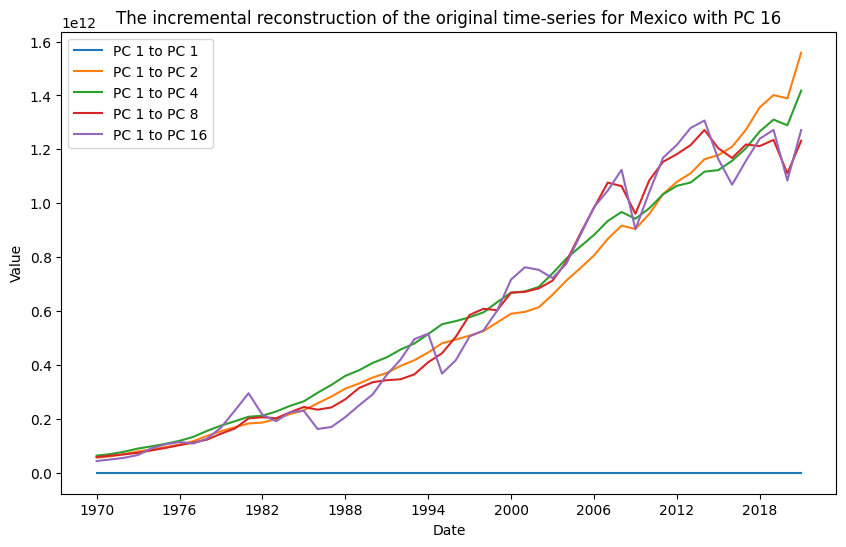

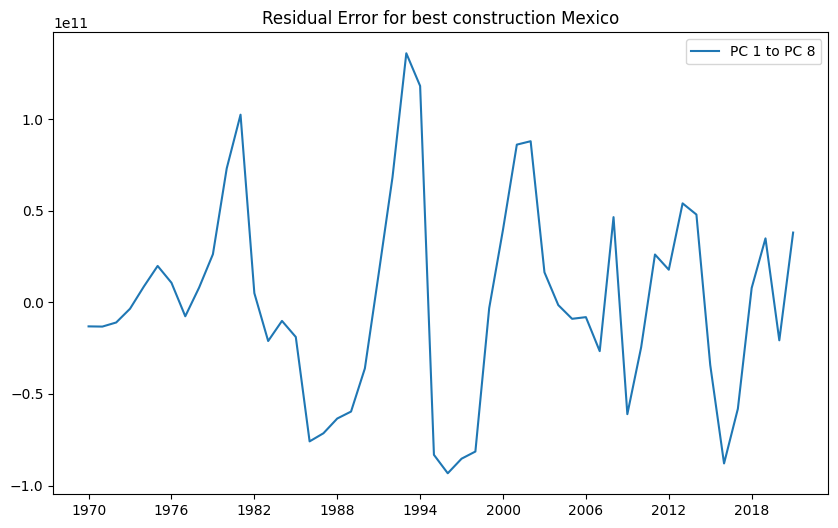

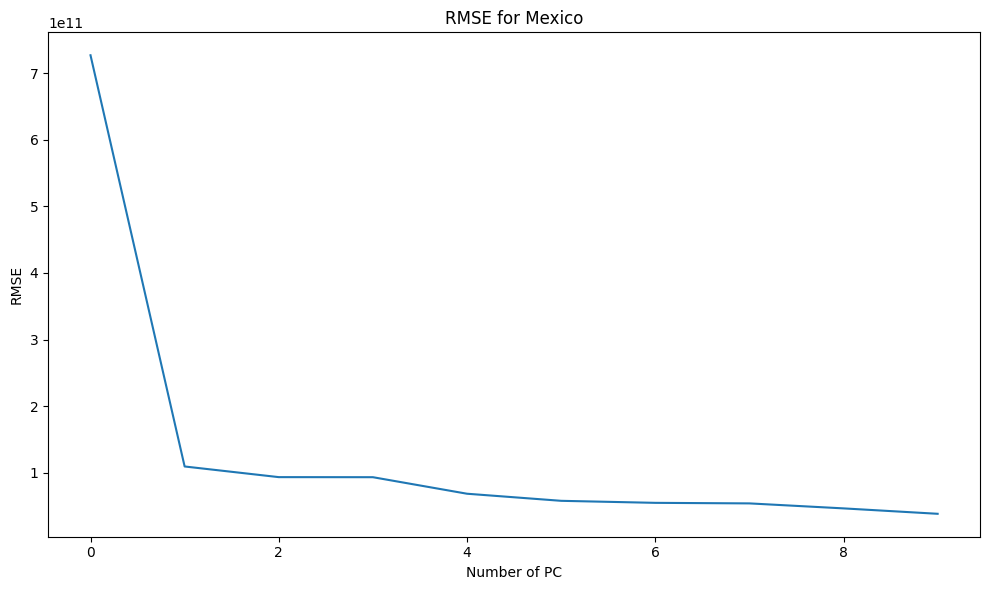

In [64]:
plot_country_figures_SVD(data_raw, 'Mexico')

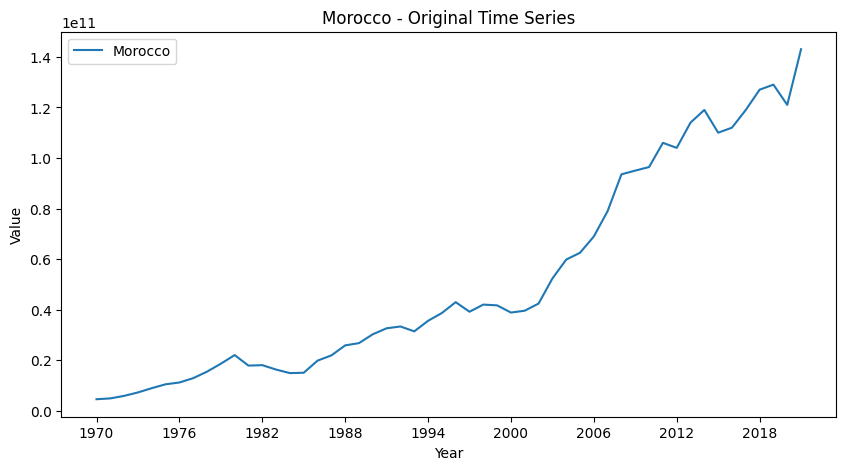

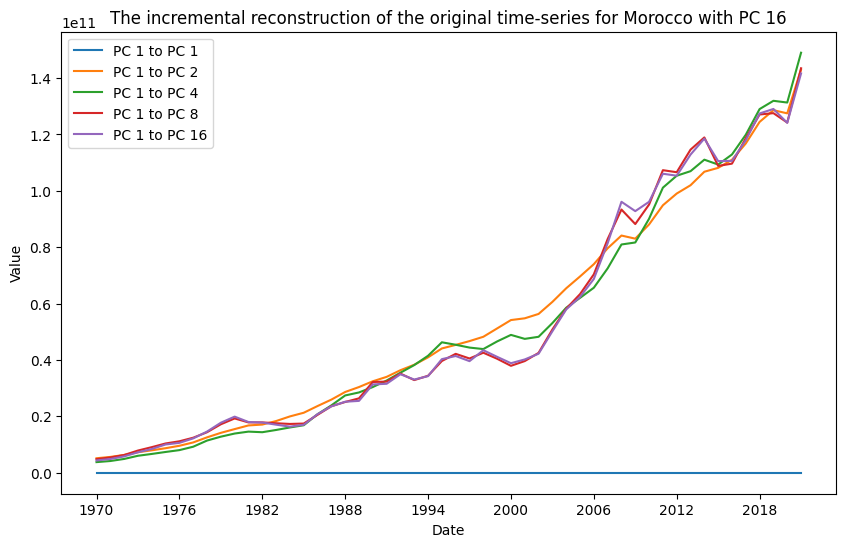

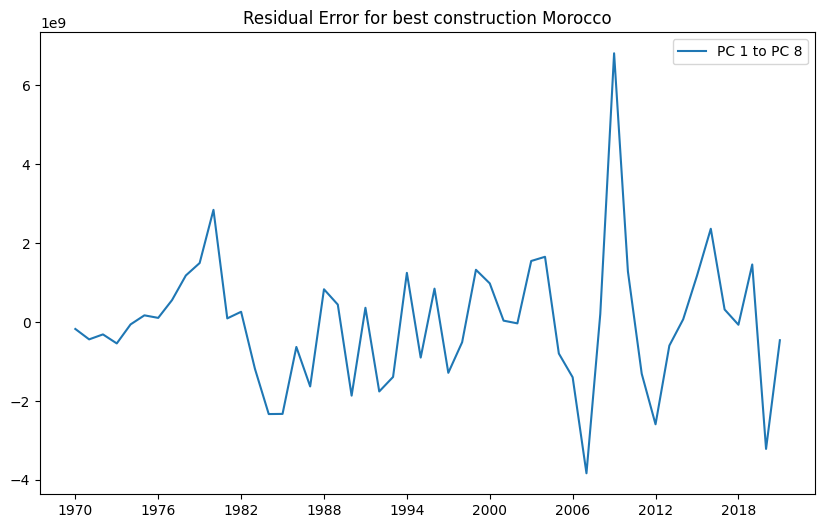

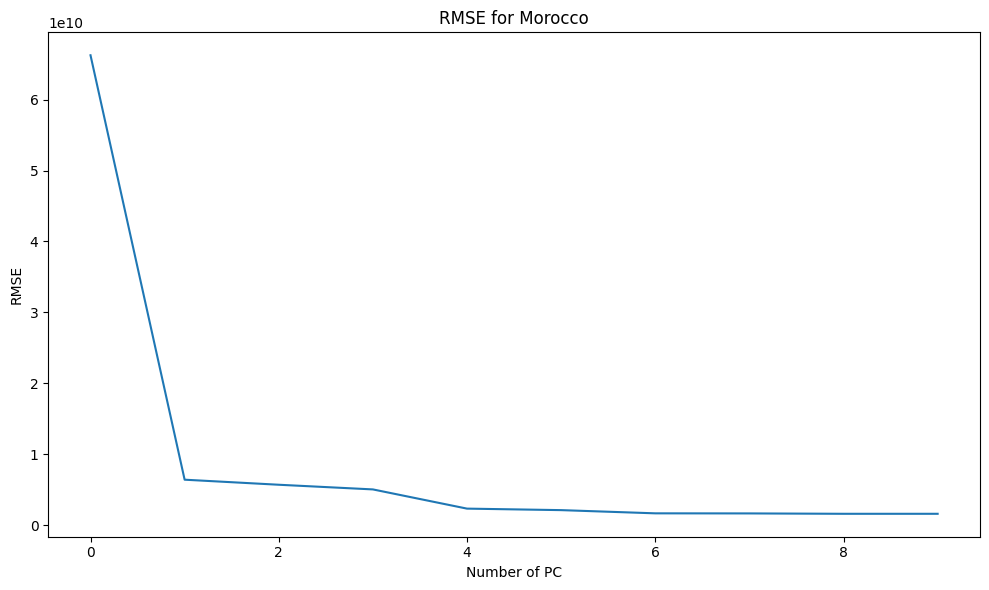

In [65]:
plot_country_figures_SVD(data_raw, 'Morocco')

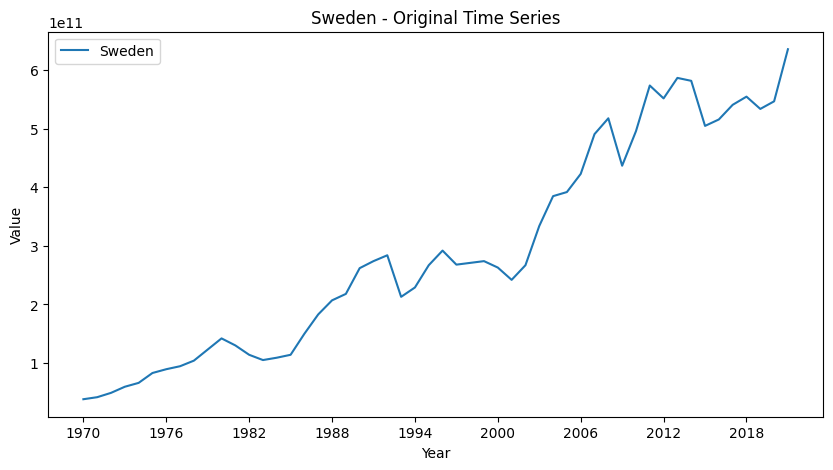

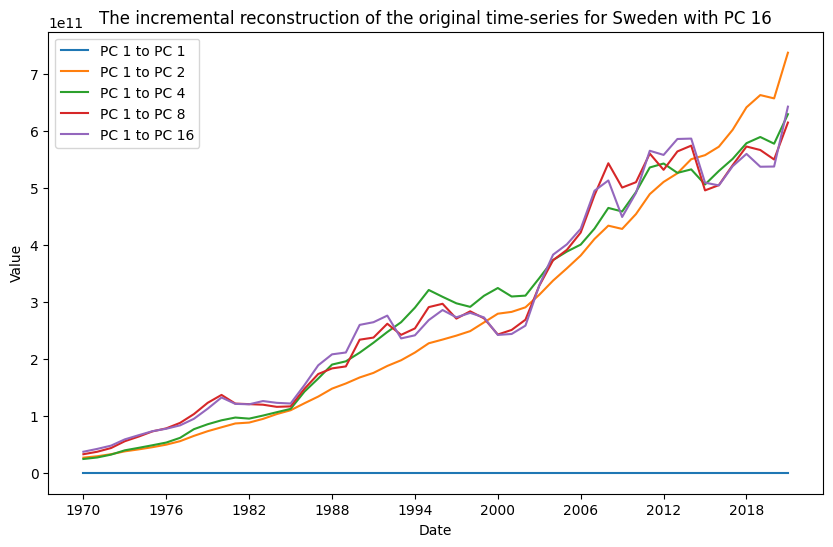

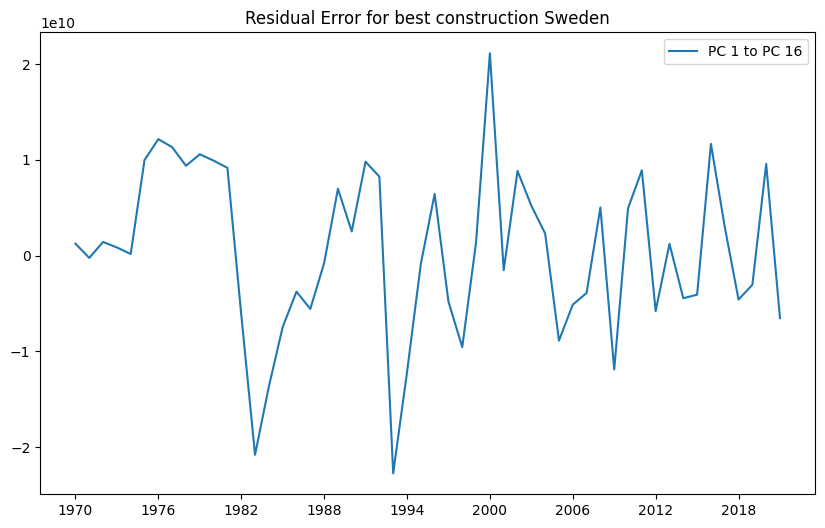

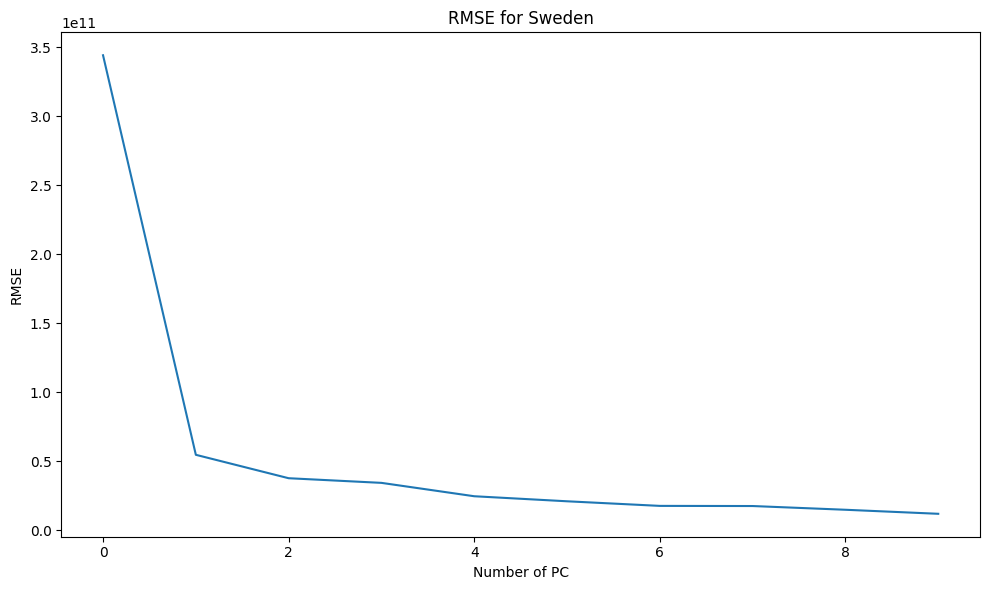

In [66]:
plot_country_figures_SVD(data_raw, 'Sweden')

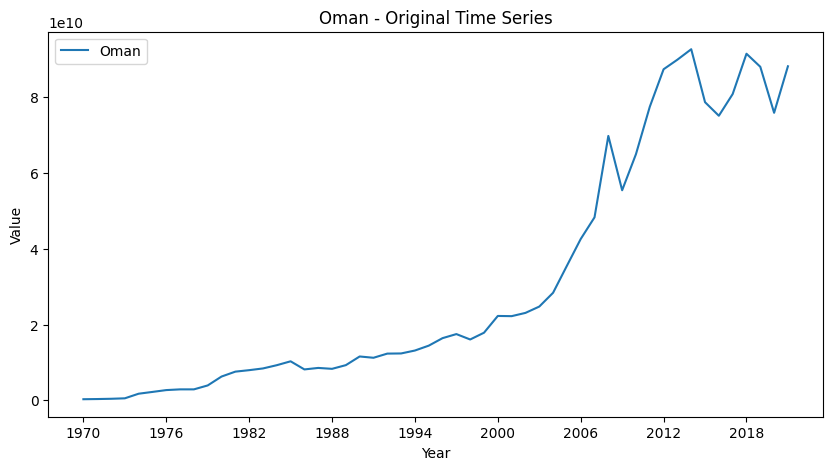

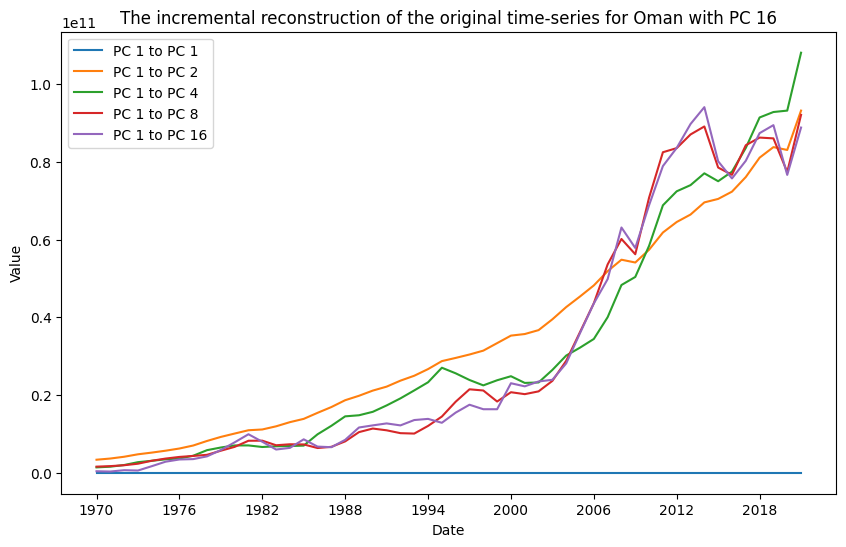

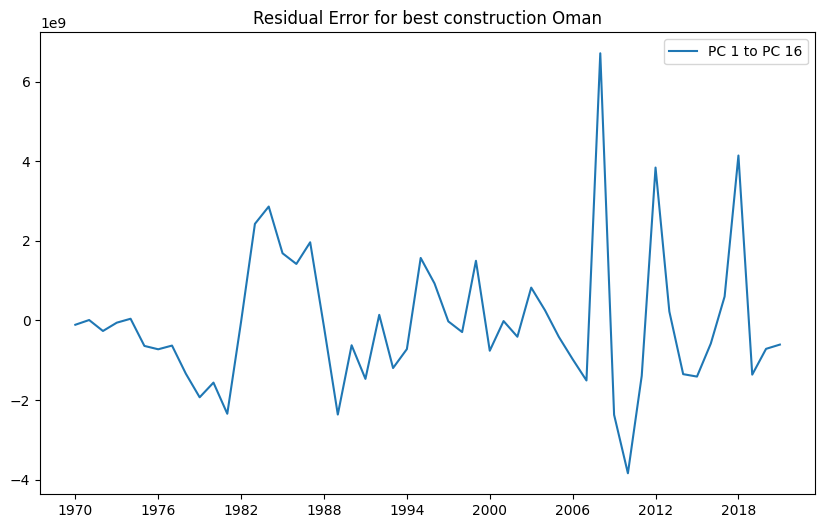

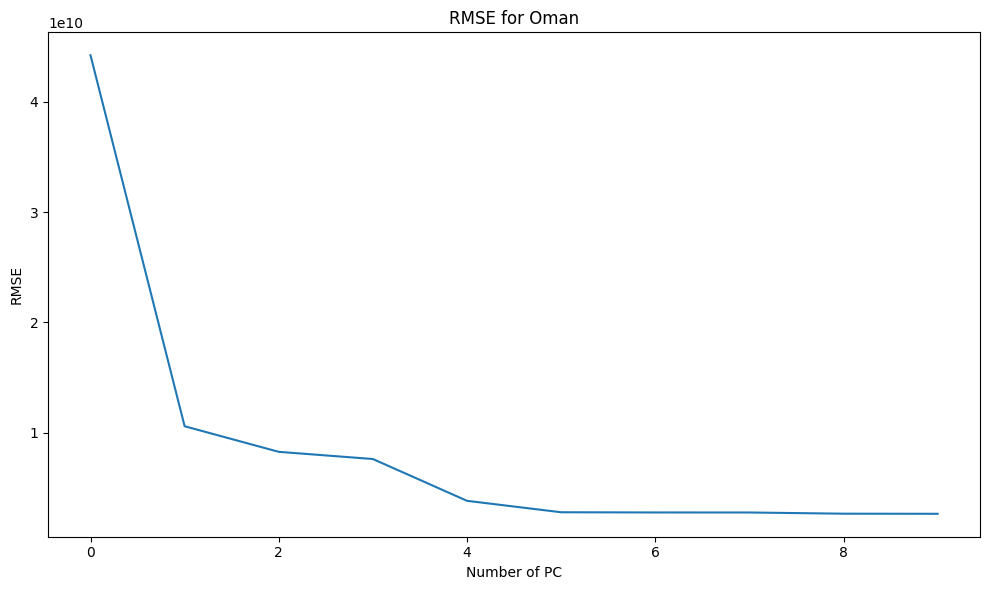

In [67]:
plot_country_figures_SVD(data_raw, 'Oman')

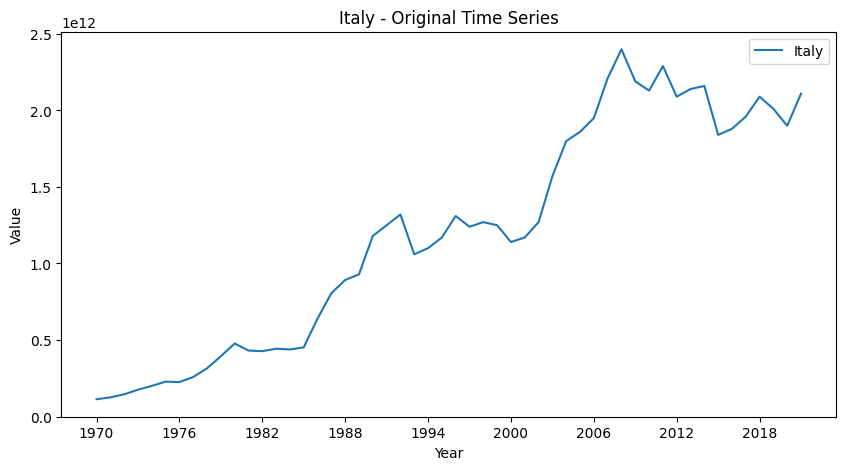

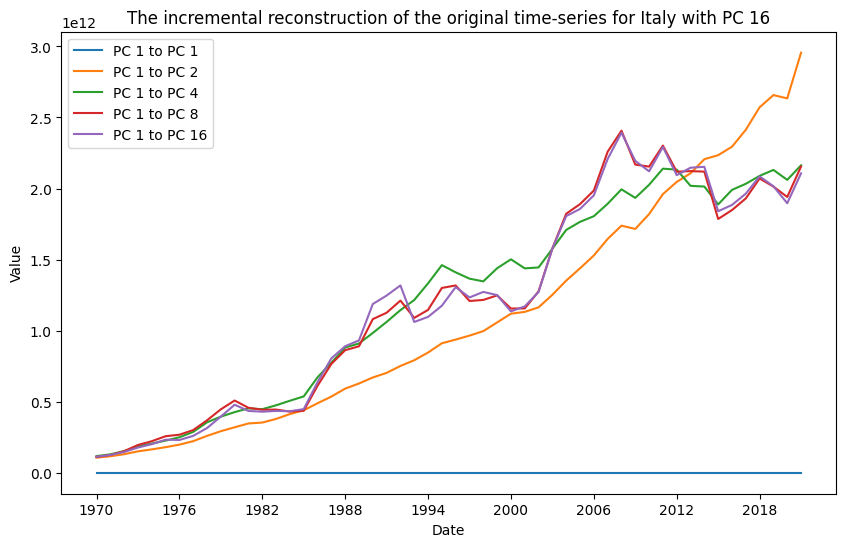

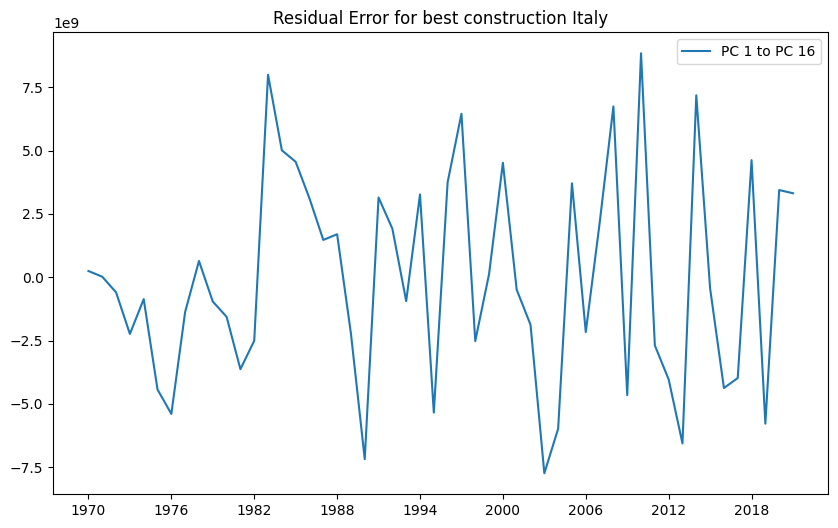

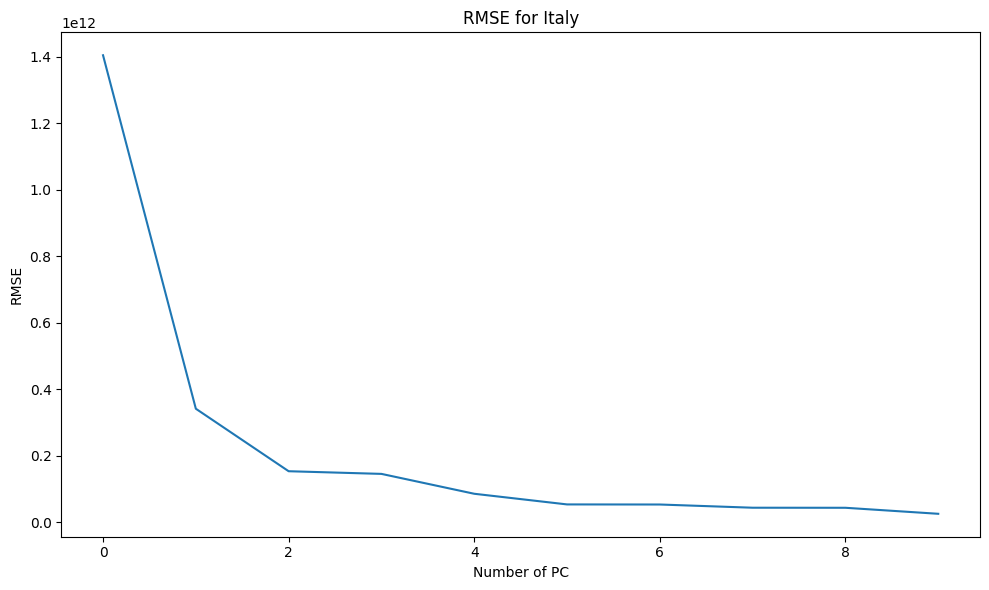

In [68]:
plot_country_figures_SVD(data_raw, 'Italy')

In [69]:
# Function to compare PCA and SVD
def compare(original_df, country):
    rmse_pca = []
    rmse_svd = []

    raw = original_df.copy()
    raw.set_index('Country', inplace=True)


    # PCA eigenvectors
    # Standardize the Data
    scaler = StandardScaler()
    std_df = scaler.fit_transform(raw)
    std_df = pd.DataFrame(std_df, columns=raw.columns, index = raw.index)

    # Compute Covariance Matrix
    n, m = std_df.shape
    data_cov = np.dot(std_df.T, std_df) / (n-1)

    # Calculate Eigenvalues and Eigenvectors and Sort Eigenvalues and Select Principal Components
    eigenValues_sd, eigenVectors_sd = get_sorted_eigen(data_cov)

    # Transform the Data
    for i in range(data_raw.shape[1]):
      W = eigenVectors_sd[:, 0:i]
      projX = np.dot(std_df.loc[country, :], W)
      reconX = np.dot(projX, W.T)
      reconX = reconX.reshape(1, -1)
      reconX_trans = scaler.inverse_transform(reconX)
      reconX_df = pd.DataFrame(reconX_trans, columns = raw.columns)
      rmse_p = mean_squared_error(original_df.loc[original_df['Country'] == country, original_df.columns[:-1]].values.flatten(), reconX_trans.flatten())**0.5
      rmse_pca.append(rmse_p)

    min_pca = min(rmse_pca)

    # SVD eigenvectors
    U, s, V = np.linalg.svd(raw, full_matrices=False)
    eigenVectors = V.T
    idx = np.argsort(-s)
    eigenVectors_svd = eigenVectors[:,idx] # Get the reordered eigenvectors
    # Transform the data
    for i in range(data_raw.shape[1]):
      W = eigenVectors_svd[:,0:i]
      projX = np.dot(raw.loc[country, :], W)
      reconX = np.dot(projX, W.T)
      reconX = reconX.reshape(1, -1)
      reconX_df = pd.DataFrame(reconX, columns = raw.columns)
      rmse_s = mean_squared_error(original_df.loc[original_df['Country'] == country, original_df.columns[:-1]].values.flatten(), reconX.flatten())**0.5
      rmse_svd.append(rmse_s)

    min_svd = min(rmse_svd)

    print("The rmse of PCA is:",min_pca, "for best reconstruction: PC1 - PC"+str(rmse_pca.index(min_pca)))
    print("The rmse of SVD is:",min_svd, "for best reconstruction: PC1 - PC"+str(rmse_svd.index(min_svd)))

In [70]:
compare(data_raw, 'Malaysia')

The rmse of PCA is: 5.029984431457492e-05 for best reconstruction: PC1 - PC52
The rmse of SVD is: 0.0001490614880940767 for best reconstruction: PC1 - PC52


In [71]:
compare(data_raw, 'Mexico')

The rmse of PCA is: 0.00021119095665994887 for best reconstruction: PC1 - PC52
The rmse of SVD is: 0.0006419921300242194 for best reconstruction: PC1 - PC52


In [72]:
compare(data_raw, 'Morocco')

The rmse of PCA is: 7.179697825296159e-05 for best reconstruction: PC1 - PC52
The rmse of SVD is: 5.530836707300568e-05 for best reconstruction: PC1 - PC52


In [73]:
compare(data_raw, 'Sweden')

The rmse of PCA is: 0.00017352921978695398 for best reconstruction: PC1 - PC52
The rmse of SVD is: 0.0003266397450958644 for best reconstruction: PC1 - PC52


In [74]:
compare(data_raw, 'Oman')

The rmse of PCA is: 0.00011312510802317122 for best reconstruction: PC1 - PC52
The rmse of SVD is: 3.8334258583875594e-05 for best reconstruction: PC1 - PC52


In [75]:
compare(data_raw, 'Italy')

The rmse of PCA is: 0.0007202313805463405 for best reconstruction: PC1 - PC52
The rmse of SVD is: 0.0012068215946146497 for best reconstruction: PC1 - PC52


Both PCA and SVD perform well with no significant differences in results. However, by observation, SVD tends to achieve satisfactory results with fewer components, while PCA typically requires more components to reach similar accuracy. PCA requires covariance computation and thus standardization to ensure proper fitting and avoid biased results. SVD, on the other hand, does not rely on covariance computation and can work without standardization, making it computationally simpler. Nevertheless, standardization is generally recommended for SVD as it centers the data, improving the quality of results.

# Part 5: Let's collect another dataset! [2.5 Marks]
Create another dataset similar to the dataset in part 1, this time using the raw information on average monthly electricity sales across various states of the United States from 2001 to 2024 [here](https://raw.githubusercontent.com/Sabaae/Dataset/main/electricity_prices.csv). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). Missing values were removed such that if there was a missing value for the average electricity sales of a particular state at a given date, that date has been completely removed from the dataset, even if the data of that specific date existed for other states.

You are free to use any tools you like, from Excel to Python! In the end, you should have a new CSV file similar to the previous dataset. How many features does the final dataset have? How many cities are there?


Upload your new dataset (in CSV format) to your colab notebook, repeat part 4 for this dataset **[1]**, and comment on the results **[0.5]**. When analyzing the states, use `New York`, `Utah`, and three other states with the closest alphabetical names to your first name.


The code below helps you to upload your new CSV file to your colab session.

In [76]:
# load train.csv to Google Colab
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/electricity_prices.csv',
    index_col=0
)

df

date  year  month stateDescription      sectorName  price  \
0      2001-01-01  2001      1          Wyoming     all sectors   4.31   
1      2001-01-01  2001      1          Wyoming      commercial   5.13   
2      2001-01-01  2001      1          Wyoming      industrial   3.26   
3      2001-01-01  2001      1          Wyoming           other   4.75   
4      2001-01-01  2001      1          Wyoming     residential   6.01   
...           ...   ...    ...              ...             ...    ...   
85865  2024-01-01  2024      1         Arkansas     all sectors   9.63   
85866  2024-01-01  2024      1         Arkansas      commercial  10.26   
85867  2024-01-01  2024      1         Arkansas      industrial   7.08   
85868  2024-01-01  2024      1         Arkansas     residential  11.24   
85869  2024-01-01  2024      1         Arkansas  transportation  12.70   

         revenue       sales  
0       48.12840  1116.17208  
1       12.67978   247.08691  
2       19.60858   602.30484  
3        0.76868    16.17442  
4       15.07136   250.60591  
...          ...         ...  
85865  442.98773  4598.63147  
85866   97.79467   953.02154  
85867  109.92656  1553.02838  
85868  235.26399  2092.56172  
85869    0.00252     0.01984  

[85870 rows x 8 columns]

In [77]:
df_all_sectors = df[df['sectorName'] == 'all sectors'] # If all sector cannot represent the whole situation of sales, then ignore this line.
df_grouped = df_all_sectors.groupby(['date', 'stateDescription'])['sales'].mean().reset_index()
df_pivot = df_grouped.pivot(index='stateDescription', columns='date', values='sales').reset_index()
df_pivot.rename(columns={'stateDescription': 'State'}, inplace=True)

df_pivot

date               State   2001-01-01   2001-02-01   2001-03-01   2001-04-01  \
0                Alabama   7362.47302   6041.02574   5894.61038   6064.53539   
1                 Alaska    521.03566    486.09655    443.79575    442.19678   
2                Arizona   4786.79176   4416.00228   4362.10349   4184.61427   
3               Arkansas   3804.21013   3256.86530   3031.50981   2973.53436   
4             California  21744.31668  18305.55916  21351.40877  18855.59986   
..                   ...          ...          ...          ...          ...   
57    West North Central  22533.46497  20180.91477  19682.58541  18641.81774   
58    West South Central  42229.87484  36854.14972  34328.34237  34577.75284   
59         West Virginia   2973.23837   2411.13253   2405.07420   2249.49921   
60             Wisconsin   5689.51118   5229.47437   5364.42631   4893.69310   
61               Wyoming   1116.17208   1127.51736   1101.55813   1058.05787   

date   2001-05-01   2001-06-01   2001-07-01   2001-08-01   2001-09-01  ...  \
0      6413.96530   7169.37956   7794.07207   7906.56345   7102.06398  ...   
1       415.90066    414.23448    421.09334    422.70564    429.95111  ...   
2      5131.87593   5816.22924   6475.18991   6529.11864   6130.78171  ...   
3      3076.88704   3550.33976   4176.61212   4428.11278   4072.36780  ...   
4     19862.25747  21194.24204  21538.59260  23772.48986  20600.89551  ...   
..            ...          ...          ...          ...          ...  ...   
57    19400.57819  21138.52695  25426.61410  25620.46859  20853.72614  ...   
58    37367.27781  43293.29006  48261.52497  51345.64853  47659.55704  ...   
59     2108.17448   2116.94231   2275.61243   2369.75638   2155.97279  ...   
60     5197.73051   5372.16377   6136.15668   6372.93371   5299.94344  ...   
61     1020.14633   1038.01908   1033.15659   1146.31006   1037.63341  ...   

date   2023-04-01   2023-05-01   2023-06-01   2023-07-01   2023-08-01  \
0      6188.47785   6722.44477   7614.18498   8609.33791   8944.48439   
1       491.61997    469.50733    447.40639    470.75186    477.70227   
2      5889.67115   7001.27492   7727.29244  10673.30122  10121.75565   
3      3426.56209   3665.63599   4232.23630   4852.03809   5216.01755   
4     16154.09389  18182.38622  19223.82354  22940.58818  25018.24230   
..            ...          ...          ...          ...          ...   
57    23156.30953  24341.16969  27294.74909  29551.37187  30516.72187   
58    49214.68876  54200.99841  62704.37117  72758.66804  76961.67584   
59     2354.53025   2482.11089   2457.40385   2832.38186   2877.37547   
60     5223.62630   5375.73332   5882.78649   6452.95554   6555.72355   
61     1353.24367   1334.82649   1278.62389   1358.40232   1379.06322   

date   2023-09-01   2023-10-01   2023-11-01   2023-12-01   2024-01-01  
0      7856.24154   6516.62250   6391.99899   6997.08197   8019.81521  
1       455.98475    488.87172    506.72640    565.94126    588.20807  
2      8085.44509   6987.36561   5615.36550   5938.68825   6326.08483  
3      4718.83341   3835.56799   3651.22771   3939.32635   4598.63147  
4     22347.58343  20282.41442  18378.73369  18560.06591  20044.01987  
..            ...          ...          ...          ...          ...  
57    26496.85824  24254.66094  24403.01523  26438.49837  29551.76048  
58    69517.39121  59593.38590  51468.26374  51734.06556  56528.68620  
59     2471.32150   2546.11379   2655.23228   2977.38784   3260.61762  
60     5694.13129   5457.27676   5380.15795   5751.10064   6107.46337  
61     1336.60598   1390.55527   1445.07904   1562.45686   1632.47508  

[62 rows x 278 columns]

The data has 25 features. They are years from 2001 to 2024 and State. There are 62 rows as 62 cities are included in this dataset.

In [78]:
def plot_data_Part5(df, country):
    df["State"] = df["State"].str.strip()
    country = country.strip()
    feature_country_data = df[df["State"] == country]

    # Ensure that there is data for the specified country
    if feature_country_data.empty:
        print(f"No data found for State: {country}")
        return

    # Extract the Year and Value columns (assuming Year is the first column, and Value is the second column)
    Year = feature_country_data.columns[1:]
    Value = feature_country_data.iloc[0, 1:].values

    # Set up a single plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the data
    ax.plot(Year, Value, label=country)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_title(f"{country} - Original Time Series")
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    ax.legend()

    plt.show()

def plot_country_figures_SVD_5(original_df, state_name):
    # Use SVD instead of PCA
    U, s, V = np.linalg.svd(original_df.iloc[:, 1:], full_matrices=False)
    eigenVectors = V.T
    idx = np.argsort(-s)
    eigenVectors = eigenVectors[:, idx]  # Get the reordered eigenvectors

    # Plot1: the original time-series of the given state.
    plot_data_Part5(original_df, state_name)

    # Plot2: the incremental reconstruction of the original time-series for the specified state in a single plot.
    PC_list = [1, 2, 4, 8, 16]
    reconX = []
    date = original_df.columns[1:]
    for num_of_eigenvector in PC_list:
        W = eigenVectors[:, 0:num_of_eigenvector]
        state_data = original_df.loc[original_df['State'] == state_name, original_df.columns[1:]].values
        projX = np.dot(state_data, W)
        reconstruction = np.dot(projX, W.T)
        reconX.append(reconstruction.reshape(original_df.shape[1]-1))

    plt.figure(figsize=(10, 6))
    for i in range(len(PC_list)):
        data = reconX[i]
        PCindex = str(PC_list[i] + 1)
        plt.plot(date, data, label='PC 1 to PC {}'.format(PCindex))
        plt.title('The incremental reconstruction of the original time-series for ' + state_name + ' with PC ' + PCindex)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
        plt.legend()

    # Plot3: The residual error for your best reconstruction with respect to the original time-series.
    resid = []
    plt.figure(figsize=(10, 6))
    for num_of_eigenvector in PC_list:
        W = eigenVectors[:, 0:num_of_eigenvector]
        state_data = original_df.loc[original_df['State'] == state_name, original_df.columns[1:]].values
        projX = np.dot(state_data, W)
        reconX = np.dot(projX, W.T)
        reconX = reconX.reshape(1, -1)

        # Get the residual
        residual = state_data - reconX
        resid.append(residual)

    residual_error = [np.mean(np.sum(r) ** 2) for r in resid]
    min_index = np.argmin(residual_error)
    minr = resid[min_index]
    index = str(PC_list[min_index] + 1)
    minr_df = pd.DataFrame(minr, columns=date)
    plt.plot(minr_df.iloc[0, :], label='PC 1 to PC ' + index)
    plt.title("Residual Error for best reconstruction " + state_name)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.legend()

    # Plot4: The RMSE of the reconstruction as a function of the number of included components.
    rmse_list = []
    plt.figure(figsize=(10, 6))
    for num_of_eigenvector in range(11):
        W = eigenVectors[:, 0:num_of_eigenvector]
        state_data = original_df.loc[original_df['State'] == state_name, original_df.columns[1:]].values
        projX = np.dot(state_data, W)
        reconX = np.dot(projX, W.T)
        reconX = reconX.reshape(1, -1)

        # Get the rmse
        rmse = mean_squared_error(state_data.flatten(), reconX.flatten()) ** 0.5
        rmse_list.append(rmse)

    plt.plot(rmse_list)
    plt.title('RMSE for ' + state_name)
    plt.xlabel('Number of PC')
    plt.ylabel("RMSE")
    plt.tight_layout()
    plt.show()


def compare5(original_df, country):
    rmse_pca = []
    rmse_svd = []

    # Standardize the Data
    scaler = StandardScaler()
    std_df = scaler.fit_transform(original_df.iloc[:, 1:])
    std_df = pd.DataFrame(std_df, columns=original_df.columns[1:], index=original_df.index)

    # Compute Covariance Matrix
    n, m = std_df.shape
    data_cov = np.dot(std_df.T, std_df) / (n - 1)

    # Calculate Eigenvalues and Eigenvectors and Sort Eigenvalues and Select Principal Components
    eigenValues_sd, eigenVectors_sd = get_sorted_eigen(data_cov)

    # Transform the Data (PCA)
    for i in range(1, original_df.shape[1]):
        W = eigenVectors_sd[:, :i]
        state_data = std_df.loc[original_df['State'] == country, :].values.flatten()  # Proper indexing
        projX = np.dot(state_data, W)
        reconX = np.dot(projX, W.T).reshape(1, -1)
        reconX_trans = scaler.inverse_transform(reconX)
        rmse_p = mean_squared_error(
            original_df.loc[original_df['State'] == country, original_df.columns[1:]].values.flatten(),
            reconX_trans.flatten()
        ) ** 0.5
        rmse_pca.append(rmse_p)

    min_pca = min(rmse_pca)

    # SVD Eigenvectors
    U, s, V = np.linalg.svd(original_df.iloc[:, 1:], full_matrices=False)
    eigenVectors_svd = V.T
    idx = np.argsort(-s)
    eigenVectors_svd = eigenVectors_svd[:, idx]  # Get the reordered eigenvectors

    # Transform the Data (SVD)
    for i in range(1, original_df.shape[1]):
        W = eigenVectors_svd[:, :i]
        state_data = original_df.loc[original_df['State'] == country, original_df.columns[1:]].values.flatten()
        projX = np.dot(state_data, W)
        reconX = np.dot(projX, W.T).reshape(1, -1)
        rmse_s = mean_squared_error(
            original_df.loc[original_df['State'] == country, original_df.columns[1:]].values.flatten(),
            reconX.flatten()
        ) ** 0.5
        rmse_svd.append(rmse_s)

    min_svd = min(rmse_svd)

    print("The rmse of PCA is:", min_pca, "for best reconstruction: PC1 - PC" + str(rmse_pca.index(min_pca) + 1))
    print("The rmse of SVD is:", min_svd, "for best reconstruction: PC1 - PC" + str(rmse_svd.index(min_svd) + 1))

def part5(original_df, country):
    plot_country_figures_SVD_5(original_df, country)
    compare5(original_df, country)

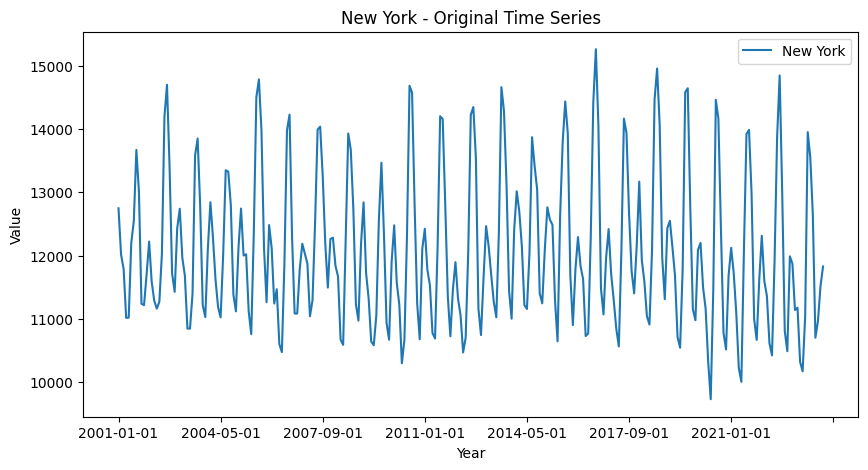

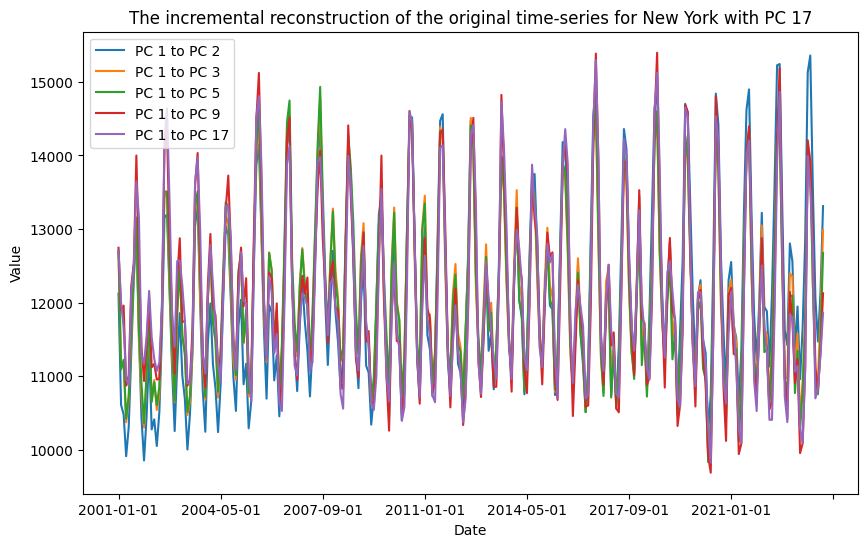

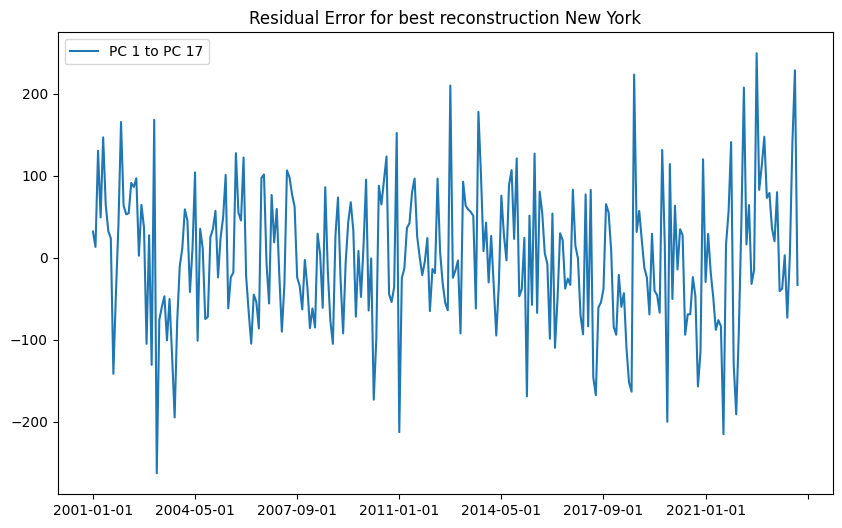

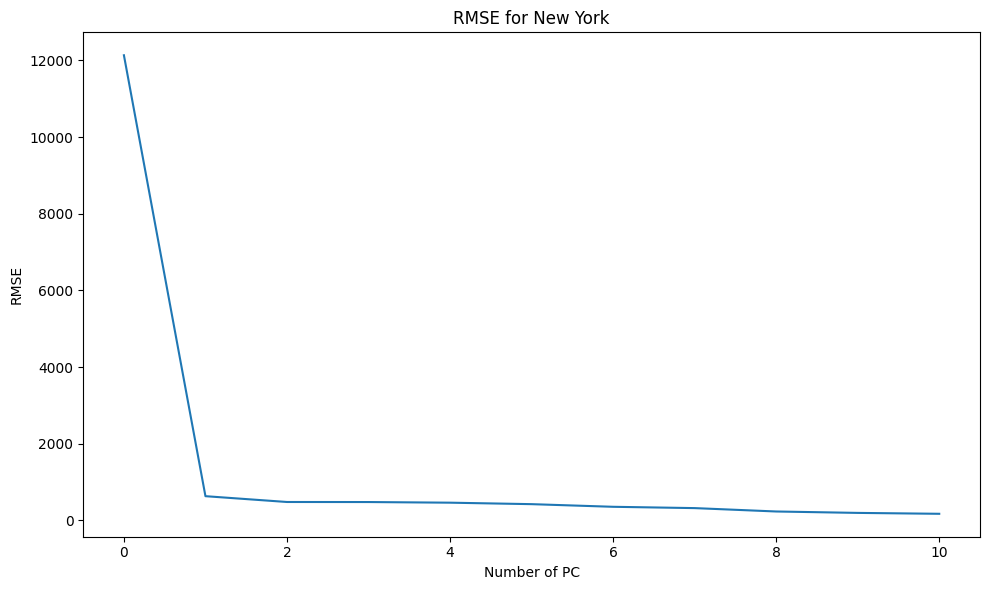

The rmse of PCA is: 3.359744013934883e-12 for best reconstruction: PC1 - PC277
The rmse of SVD is: 8.552791316078405e-12 for best reconstruction: PC1 - PC62


In [79]:
part5(df_pivot, 'New York')

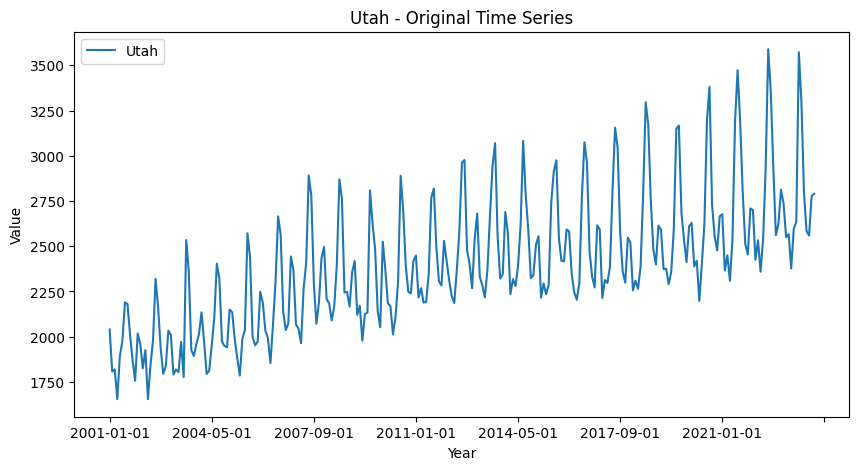

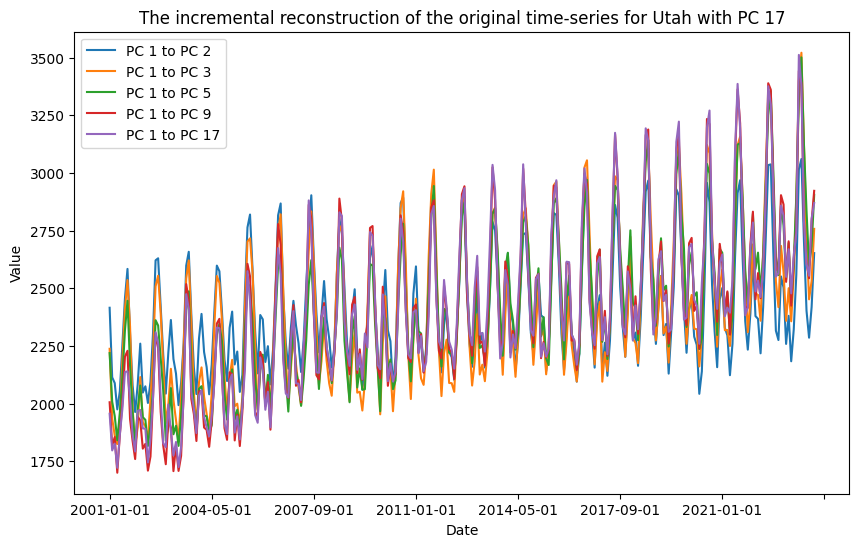

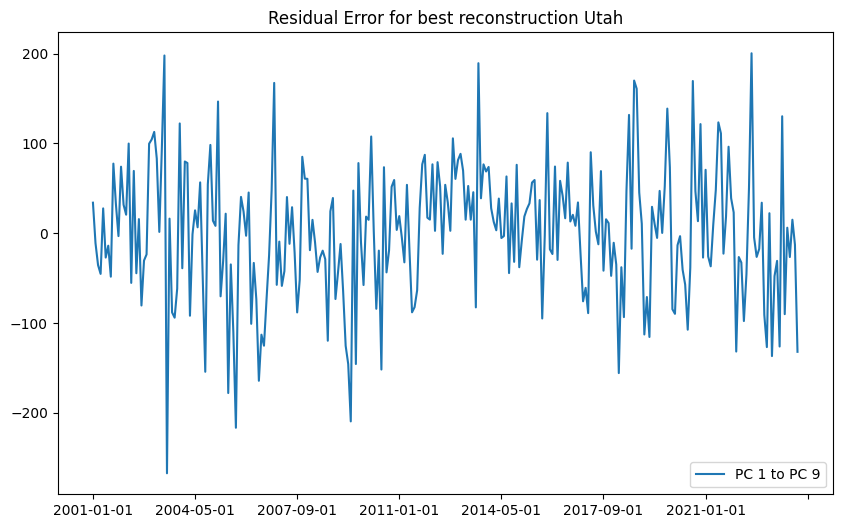

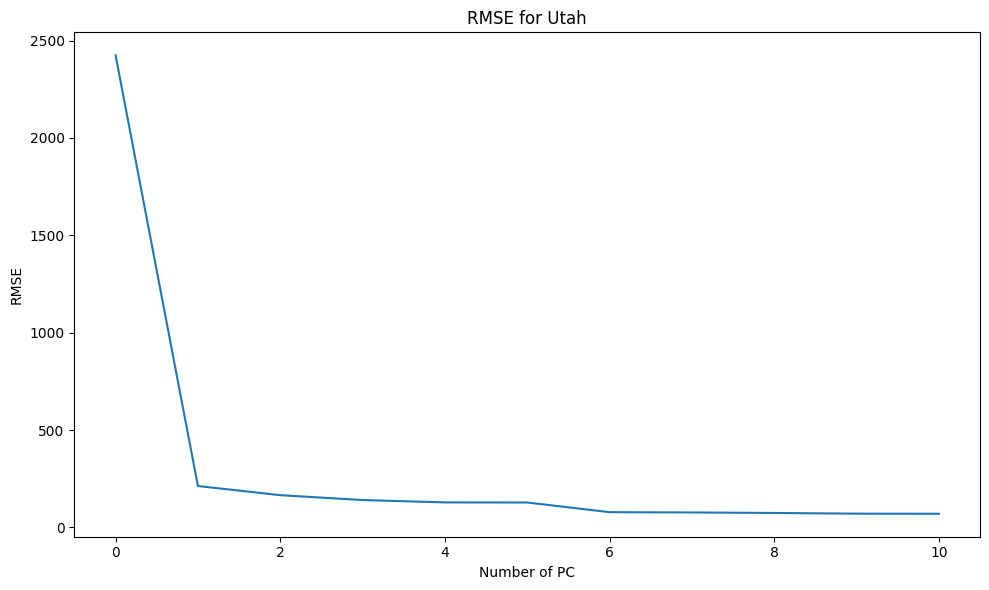

The rmse of PCA is: 1.5055820244409002e-11 for best reconstruction: PC1 - PC277
The rmse of SVD is: 2.1188634922673784e-12 for best reconstruction: PC1 - PC62


In [80]:
part5(df_pivot, 'Utah')

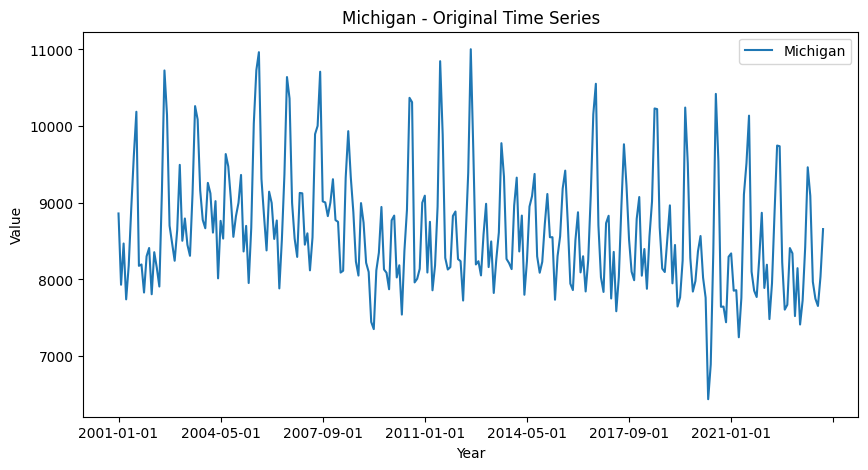

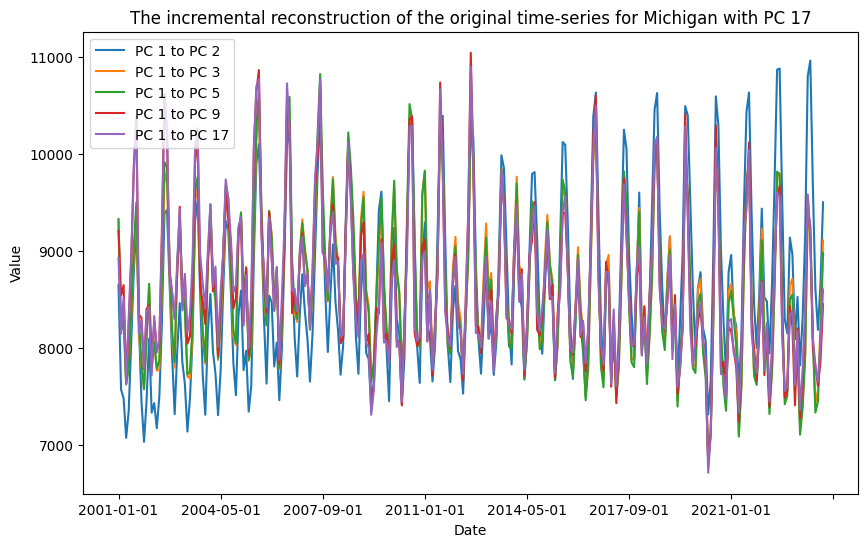

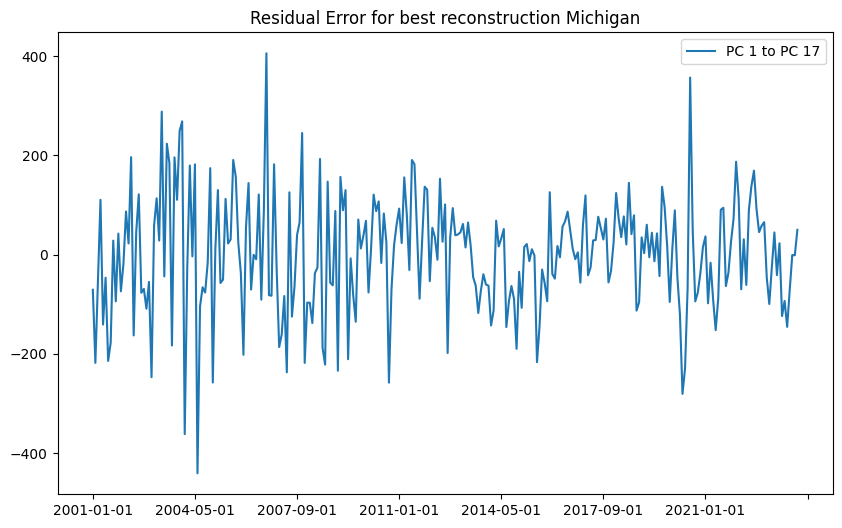

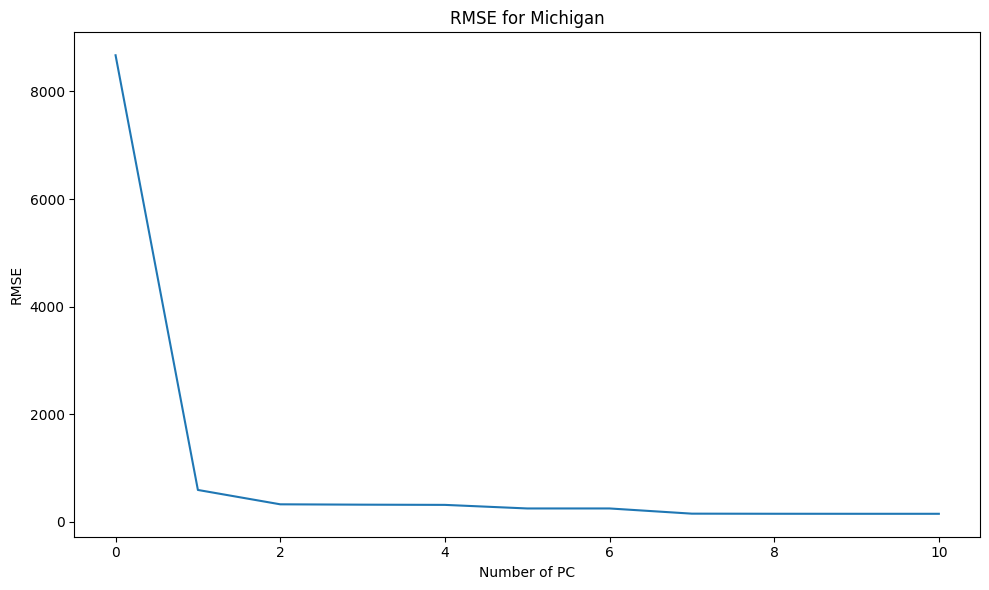

The rmse of PCA is: 7.125417151542037e-12 for best reconstruction: PC1 - PC277
The rmse of SVD is: 8.159874998621133e-12 for best reconstruction: PC1 - PC62


In [81]:
part5(df_pivot, 'Michigan')

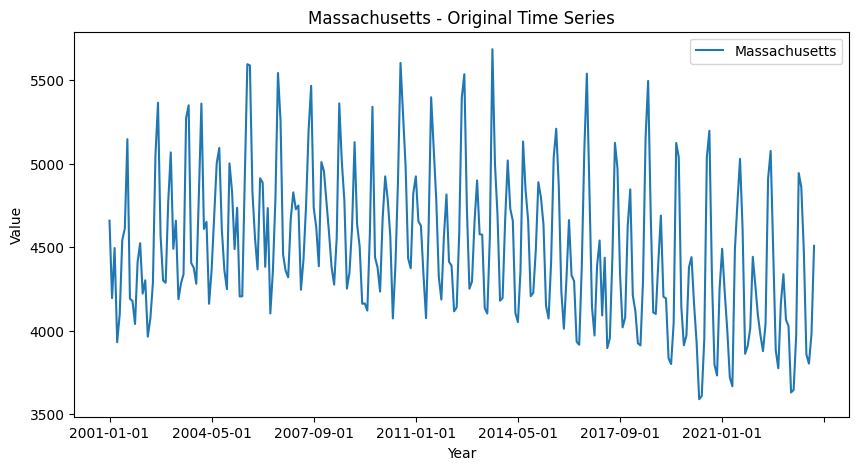

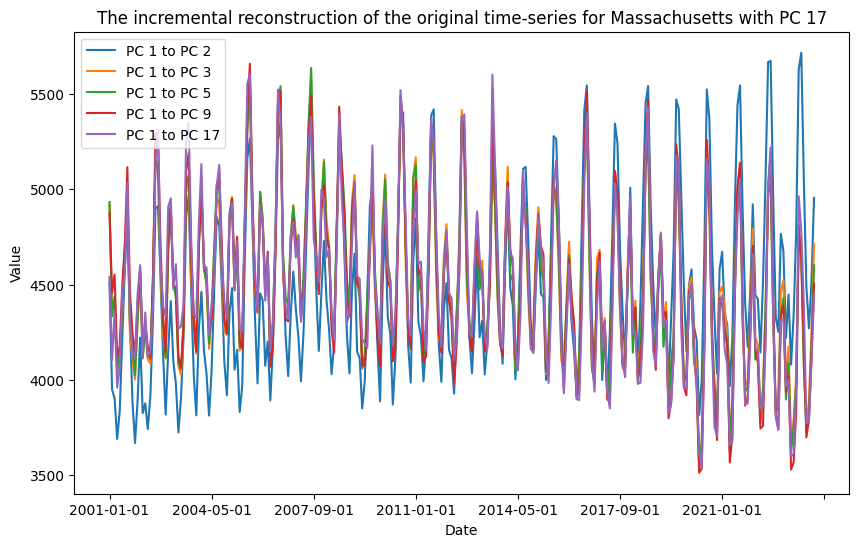

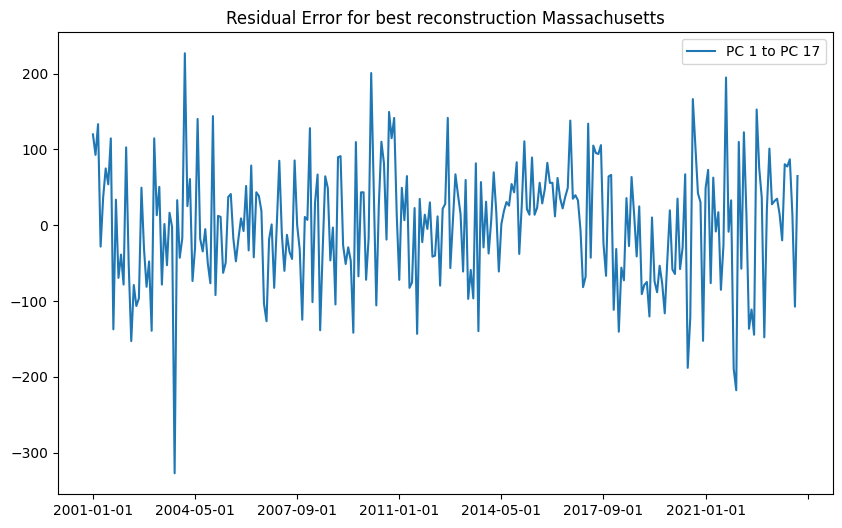

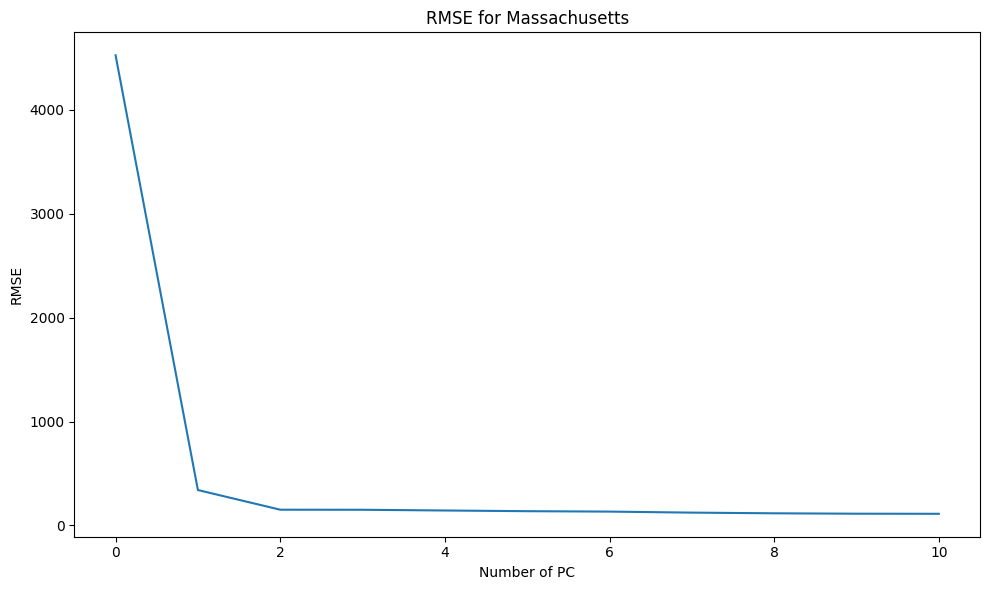

The rmse of PCA is: 1.3265508534762761e-11 for best reconstruction: PC1 - PC277
The rmse of SVD is: 4.7437689706708104e-12 for best reconstruction: PC1 - PC62


In [82]:
part5(df_pivot, 'Massachusetts')

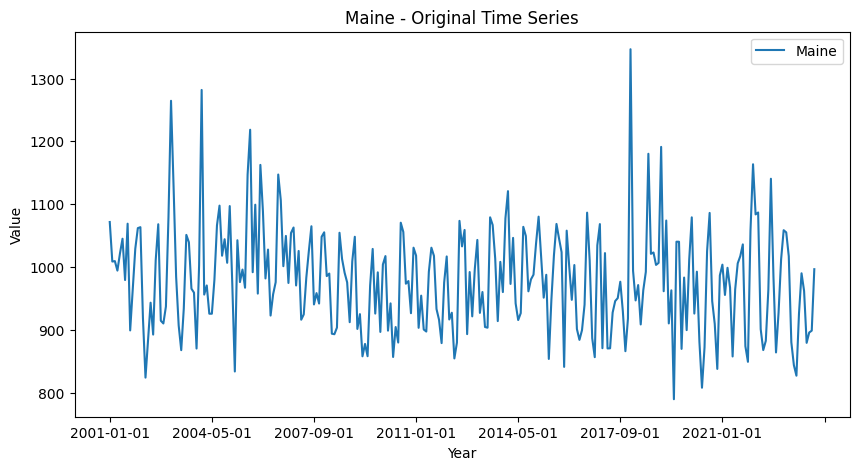

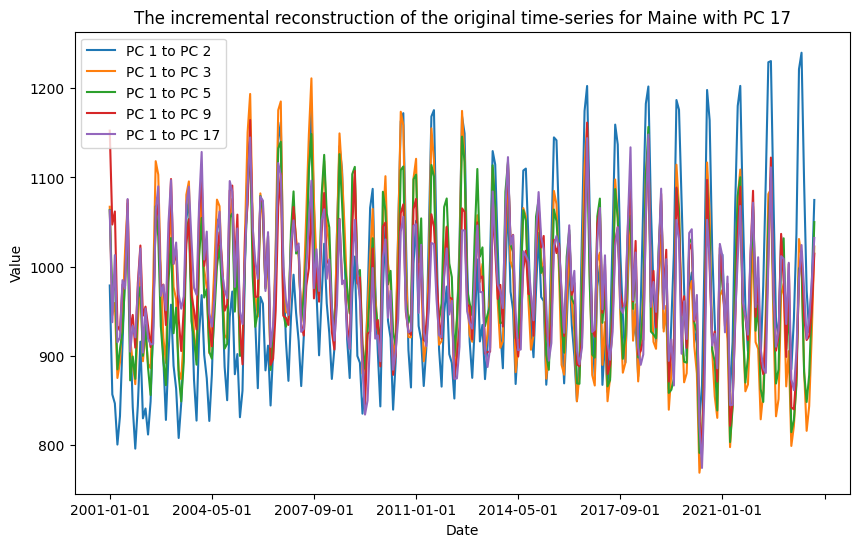

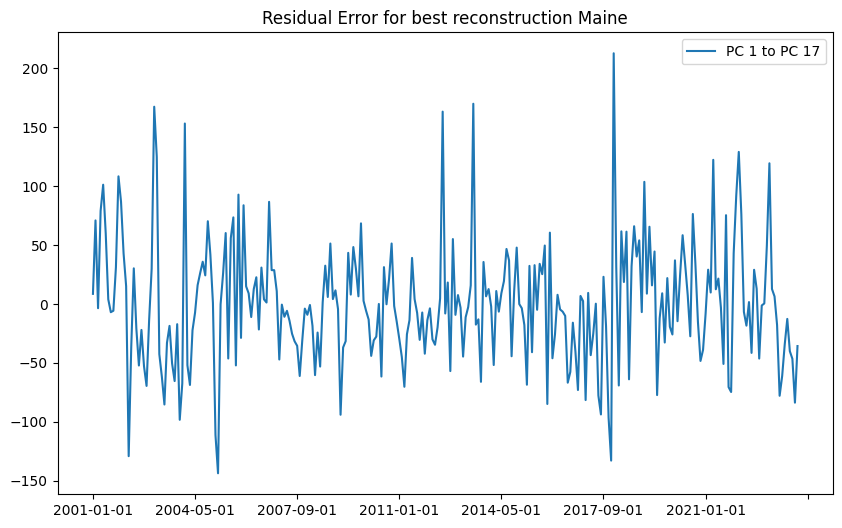

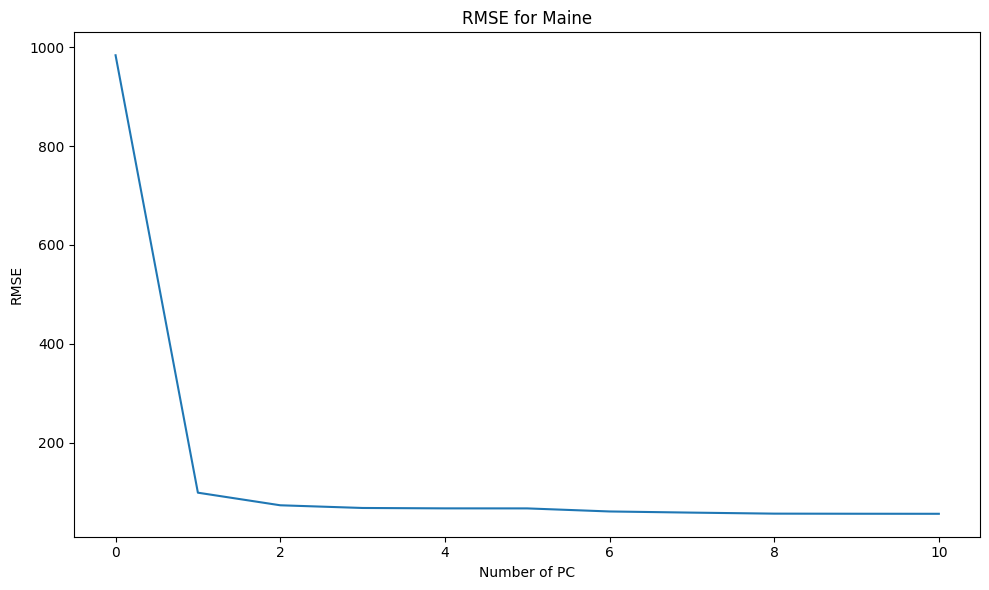

The rmse of PCA is: 1.5313321592449603e-11 for best reconstruction: PC1 - PC277
The rmse of SVD is: 8.401026409228137e-13 for best reconstruction: PC1 - PC62


In [83]:
part5(df_pivot, 'Maine')

Both PCA and SVD deliver good performance with similar accuracy levels. SVD often reaches satisfactory accuracy with fewer components compared to PCA, which generally needs more components to achieve the same precision. PCA requires calculating the covariance matrix and thus benefits from standardization to ensure the data is well-scaled and results are unbiased. In contrast, SVD doesn’t rely on the covariance matrix and can operate without standardization, making it computationally simpler. Even so, standardizing data is usually recommended for SVD as well, as it centers the data, enhancing the quality of the results.

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

U.S. Electricity Prices Data:

1. https://www.kaggle.com/datasets/alistairking/electricity-prices
